# Analysis of group subjects with matrix sentencesXvoxels

written by Manon Pietrantoni
2024

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import os
from sklearn.decomposition import PCA, FastICA
from matplotlib.patches import Ellipse
from sklearn.cluster import KMeans
from scipy.stats import ttest_ind, pearsonr
import seaborn as sns
import h5py
import math as m

Open the data csv format

file size: 2Go

matrix size: 319*371784 (mask_size computed)

Possible voxels to test : 0 to 371783

In [2]:
voxel = list(range(0,373370))
subj = 'total'
if subj == 'total_ados':
    n_subj = 15
if subj == 'total_adults':
    n_subj = 14
if subj == 'total' or subj == 'total_maths' or subj == 'total_language':
    n_subj = 29

In [41]:
#data = pd.read_csv(f'../results/sub-{subj}_matrix_sentencesXvoxels.csv', encoding='utf-8')
#usecols=voxel,

In [42]:
#hf = h5py.File(f'../results/sub-{subj}_matrix_sentencesXvoxels.h5', 'w')
#hf.create_dataset(f'{subj}_dataset', data=data)
#hf.close()

In [3]:
hf = h5py.File(f'../results/sub-{subj}_matrix_sentencesXvoxels.h5', 'r')
data_h5 = hf.get(f'{subj}_dataset')

In [4]:
data = np.array(data_h5)
data.shape

(319, 371784)

In [5]:
print(data.shape)
voxel = list(range(0,data.shape[1]))
n_sentences = data.shape[0]

(319, 371784)


Test PCA on the voxels

In [6]:
ncomponents= 9
pca = PCA(n_components= ncomponents)
data_pca = pca.fit_transform(data)
print(data_pca.shape)

(319, 9)


In [7]:
print(type(data_pca))
df = pd.DataFrame(data = data_pca)
df.to_csv(f'{subj}_matrix_sentencesXpca_components.csv', index = False)

<class 'numpy.ndarray'>


In [8]:
matrix_pca_componentsXvoxels = np.dot(data_pca.T,data)

In [9]:
matrix_pca_componentsXvoxels.shape
type(matrix_pca_componentsXvoxels)
df = pd.DataFrame(data = matrix_pca_componentsXvoxels)
df.to_csv(f'{subj}_matrix_pca_componentsXvoxels.csv', index = False)

0.2717215572386721


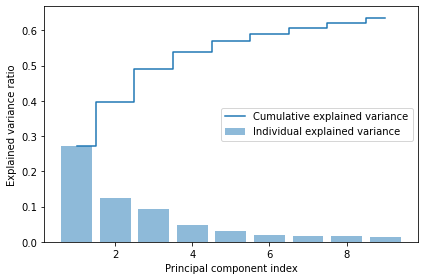

In [10]:
exp_var_pca = pca.explained_variance_ratio_
print(exp_var_pca[0])
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(1,len(exp_var_pca)+1), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,len(cum_sum_eigenvalues)+1), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
#plt.vlines(6.0, 0, 0.8, linestyles ="dotted", colors ="k")
#plt.vlines(20, 0, 0.8, linestyles ="dotted", colors ="b")
t = np.arange(1.0, ncomponents, 1)
s = 0.015*t+0.50
#plt.plot(t, s)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

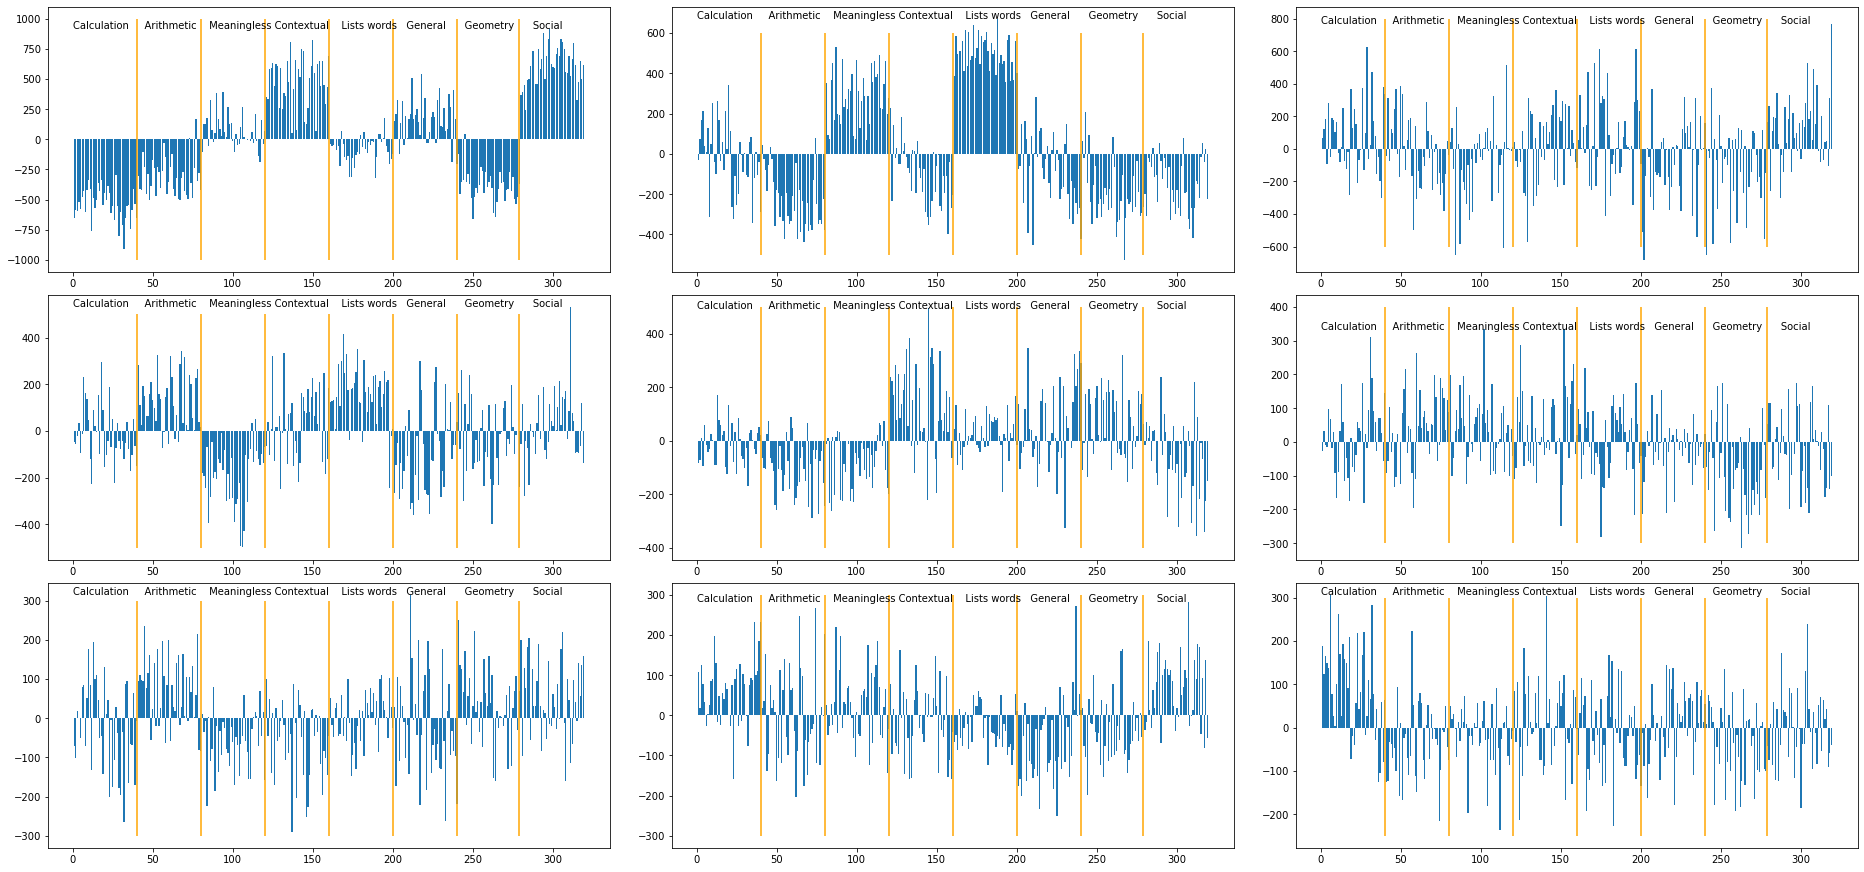

In [11]:
fig, axs = plt.subplots(3, 3, layout='constrained', figsize = (26,12))
names= list(range(1,data.shape[0]+1))
axs[0,0].bar(names, data_pca[:,0])
axs[0,0].vlines([40,80,120,160,200,240,279],1000,-1000, linestyles ="-", colors ="orange")
axs[0,0].text(0,data_pca[:,0].max(),'Calculation     Arithmetic    Meaningless Contextual    Lists words   General      Geometry      Social')
axs[0,1].bar(names, data_pca[:,1])
axs[0,1].vlines([40,80,120,160,200,240,279],600,-500, linestyles ="-", colors ="orange")
axs[0,1].text(0,data_pca[:,1].max(),'Calculation     Arithmetic    Meaningless Contextual    Lists words   General      Geometry      Social')
axs[0,2].bar(names, data_pca[:,2])
axs[0,2].vlines([40,80,120,160,200,240,279],800,-600, linestyles ="-", colors ="orange")
axs[0,2].text(0,data_pca[:,2].max(),'Calculation     Arithmetic    Meaningless Contextual    Lists words   General      Geometry      Social')
axs[1,0].bar(names, data_pca[:,3])
axs[1,0].vlines([40,80,120,160,200,240,279],500,-500, linestyles ="-", colors ="orange")
axs[1,0].text(0,data_pca[:,3].max(),'Calculation     Arithmetic    Meaningless Contextual    Lists words   General      Geometry      Social')
axs[1,1].bar(names, data_pca[:,4])
axs[1,1].vlines([40,80,120,160,200,240,279],500,-400, linestyles ="-", colors ="orange")
axs[1,1].text(0,data_pca[:,4].max(),'Calculation     Arithmetic    Meaningless Contextual    Lists words   General      Geometry      Social')
axs[1,2].bar(names, data_pca[:,5])
axs[1,2].vlines([40,80,120,160,200,240,279],400,-300, linestyles ="-", colors ="orange")
axs[1,2].text(0,data_pca[:,5].max(),'Calculation     Arithmetic    Meaningless Contextual    Lists words   General      Geometry      Social')
axs[2,0].bar(names, data_pca[:,6])
axs[2,0].vlines([40,80,120,160,200,240,279],300,-300, linestyles ="-", colors ="orange")
axs[2,0].text(0,data_pca[:,6].max(),'Calculation     Arithmetic    Meaningless Contextual    Lists words   General      Geometry      Social')
axs[2,1].bar(names, data_pca[:,7])
axs[2,1].vlines([40,80,120,160,200,240,279],300,-300, linestyles ="-", colors ="orange")
axs[2,1].text(0,data_pca[:,7].max(),'Calculation     Arithmetic    Meaningless Contextual    Lists words   General      Geometry      Social')
axs[2,2].bar(names, data_pca[:,8])
axs[2,2].vlines([40,80,120,160,200,240,279],300,-250, linestyles ="-", colors ="orange")
axs[2,2].text(0,data_pca[:,8].max(),'Calculation     Arithmetic    Meaningless Contextual    Lists words   General      Geometry      Social')
plt.show()

In [12]:
def sort_values(data_pca):
    index_pca_sorted = np.argsort(data_pca)+1
    for i in range(index_pca_sorted.shape[0]):
        if index_pca_sorted[i]>=265:
            index_pca_sorted[i]=index_pca_sorted[i]+1
    value_pca_sorted = np.sort(data_pca)
    pca_sorted_dict = dict(zip(index_pca_sorted,value_pca_sorted))
    pca_sorted_dict = {str(k):v for k,v in pca_sorted_dict.items()}
    return pca_sorted_dict, index_pca_sorted

In [13]:
pca_sorted_dict_0, index_pca_sorted_0 = sort_values(data_pca[:,0])
pca_sorted_dict_1, index_pca_sorted_1 = sort_values(data_pca[:,1])
pca_sorted_dict_2, index_pca_sorted_2 = sort_values(data_pca[:,2])
pca_sorted_dict_3, index_pca_sorted_3 = sort_values(data_pca[:,3])
pca_sorted_dict_4, index_pca_sorted_4 = sort_values(data_pca[:,4])
pca_sorted_dict_5, index_pca_sorted_5 = sort_values(data_pca[:,5])
pca_sorted_dict_6, index_pca_sorted_6 = sort_values(data_pca[:,6])
pca_sorted_dict_7, index_pca_sorted_7 = sort_values(data_pca[:,7])
pca_sorted_dict_8, index_pca_sorted_8 = sort_values(data_pca[:,8])

In [14]:
def compute_barplot_parameters_category(pca_sorted_dict, index_pca_sorted):
    names = pca_sorted_dict.keys()
    values = pca_sorted_dict.values()

    bar_colors =[]
    for i in index_pca_sorted:
        if i == 265:
            print(i)
        if i> 0 and i < 41 and len(bar_colors)<320:     #Calculation
            bar_colors.append('gold')
        if i> 40 and i < 81:                            #Arithmetical principlaes
            bar_colors.append('chocolate')
        if i> 80 and i < 121:                           #Meaningless sentences
            bar_colors.append('grey')
        if i> 120 and i < 161:                          #Contextual knowledge
            bar_colors.append('cornflowerblue')
        if i> 160 and i < 201:                          #List of words
            bar_colors.append('lightgrey')
        if i> 200 and i < 241:                          #Factual knowledge
            bar_colors.append('darkturquoise')
        if i> 240 and i < 281:                          # Geometry
            bar_colors.append('red')
        if i> 280 and i < 321:                          #Social knowledge
            bar_colors.append('mediumblue')
    return names, values, bar_colors

In [15]:
def compute_barplot_parameters_mathvslang(pca_sorted_dict, index_pca_sorted):
    names = pca_sorted_dict.keys()
    values = pca_sorted_dict.values()

    bar_colors =[]
    for i in index_pca_sorted:
        if i> 0 and i < 41 and len(bar_colors)<320:
            bar_colors.append('red')
        if i> 40 and i < 81:
            bar_colors.append('red')
        if i> 80 and i < 121:
            bar_colors.append('grey')
        if i> 120 and i < 161:
            bar_colors.append('blue')
        if i> 160 and i < 201:
            bar_colors.append('grey')
        if i> 200 and i < 241:
            bar_colors.append('blue')
        if i> 240 and i < 281:
            bar_colors.append('red')
        if i> 280 and i < 321:
            bar_colors.append('blue')
    return names, values, bar_colors

In [16]:
sentence_details = np.array(pd.read_csv('sentence_information_details.csv'))
sentence_details = np.delete(sentence_details, 264, 0)
print(sentence_details[264,0])

266


In [17]:
print(np.median(sentence_details[:,17]))

0.9333333333333332


In [57]:
def compute_barplot_parameters_modality_check(pca_sorted_dict, index_pca_sorted):
    names = pca_sorted_dict.keys()
    values = pca_sorted_dict.values()

    bar_colors =[]
    for i in index_pca_sorted:
        for j in range(sentence_details.shape[0]):
            if int(sentence_details[j,0]) == int(i):
                if sentence_details[j,20] < -0.1 and len(bar_colors)<320:
                    bar_colors.append('coral')
                elif sentence_details[j,20] > 0.1 and len(bar_colors)<320:
                    bar_colors.append('deepskyblue')
                else:
                    bar_colors.append('k')
    print(len(bar_colors))
    return names, values, bar_colors

In [52]:
def compute_barplot_parameters_rate_answer(pca_sorted_dict, index_pca_sorted):
    names = pca_sorted_dict.keys()
    values = pca_sorted_dict.values()

    bar_colors =[]
    for i in index_pca_sorted:
        for j in range(sentence_details.shape[0]):
            if int(sentence_details[j,0]) == int(i):
                if (sentence_details[j,16]+sentence_details[j,17])/2 < (np.median(sentence_details[:,16]+sentence_details[:,17]))/2 and len(bar_colors)<320:
                    bar_colors.append('tab:red')
                else:
                    bar_colors.append('tab:green')
    print(len(bar_colors))
    return names, values, bar_colors

In [51]:
def compute_barplot_parameters_reaction_time(pca_sorted_dict, index_pca_sorted):
    names = pca_sorted_dict.keys()
    values = pca_sorted_dict.values()

    bar_colors =[]
    for i in index_pca_sorted:
        for j in range(sentence_details.shape[0]):
            if int(sentence_details[j,0]) == int(i):
                if (sentence_details[j,18]+sentence_details[j,19])/2-int(np.median([sentence_details[j,13],sentence_details[j,14]])) <= (np.median(sentence_details[:,18])+np.median(sentence_details[:,19]))/2-int(np.median([sentence_details[:,13],sentence_details[:,14]])) and len(bar_colors)<320:
                    bar_colors.append('springgreen')
                else:
                    bar_colors.append('pink')
    return names, values, bar_colors

In [20]:
def compute_barplot_parameters_break(pca_sorted_dict, index_pca_sorted):
    names = pca_sorted_dict.keys()
    values = pca_sorted_dict.values()

    bar_colors =[]
    for i in index_pca_sorted:
        if i> 0 and i < 39 and i!= 33:
            bar_colors.append('k')
        if i> 38 and i < 84 and i != 57:
            bar_colors.append('lightgrey')
        if i> 83 and i < 95 or i == 57:
            bar_colors.append('k')
        if i> 94 and i < 121:
            bar_colors.append('lightgrey')
        if i> 120 and i < 161:
            bar_colors.append('k')
        if i> 160 and i < 201:
            bar_colors.append('k')
        if i> 200 and i < 241:
            bar_colors.append('lightgrey')
        if i> 240 and i < 281:
            bar_colors.append('lightgrey')
        if i> 280 and i < 321:
            bar_colors.append('k')
    return names, values, bar_colors
    

In [21]:
def compute_barplot_parameters_space(pca_sorted_dict, index_pca_sorted):
    names = pca_sorted_dict.keys()
    values = pca_sorted_dict.values()

    bar_colors =[]
    for i in index_pca_sorted:
        for j in range(sentence_details.shape[0]):
            if int(sentence_details[j,0]) == int(i):
                if sentence_details[j,12] == 'nothing_spatial':
                    bar_colors.append('aqua')
                elif sentence_details[j,12] == 'very_spatial':
                    bar_colors.append('navy')
                elif sentence_details[j,12] == 'make_calculation':
                    bar_colors.append('aqua')
                elif sentence_details[j,12] == 'geometry':
                    bar_colors.append('navy')
                elif sentence_details[j,12] == 'list_words':
                    bar_colors.append('lightgrey')
    print(len(bar_colors))
    return names, values, bar_colors

In [22]:
def compute_barplot_parameters_calculation(pca_sorted_dict, index_pca_sorted):
    names = pca_sorted_dict.keys()
    values = pca_sorted_dict.values()

    bar_colors =[]
    for i in index_pca_sorted:
        for j in range(sentence_details.shape[0]):
            if int(sentence_details[j,0]) == int(i):
                if sentence_details[j,12] == 'make_calculation':
                    bar_colors.append('yellow')
                else:
                    bar_colors.append('lightgrey')
    print(len(bar_colors))
    return names, values, bar_colors 

In [23]:
def compute_barplot_parameters_congruence(pca_sorted_dict, index_pca_sorted):
    names = pca_sorted_dict.keys()
    values = pca_sorted_dict.values()

    bar_colors =[]
    for i in index_pca_sorted:
        for j in range(sentence_details.shape[0]):
            if int(sentence_details[j,0]) == int(i):
                if sentence_details[j,15] == 'incongruent':
                    bar_colors.append('yellow')
                elif sentence_details[j,15] == 'congruent':
                    bar_colors.append('magenta')
                else:
                    bar_colors.append('lightgrey')
    print(len(bar_colors))
    return names, values, bar_colors

In [24]:
def compute_barplot_parameters_truth_value(pca_sorted_dict, index_pca_sorted):
    names = pca_sorted_dict.keys()
    values = pca_sorted_dict.values()

    bar_colors =[]
    for i in index_pca_sorted:
        for j in range(sentence_details.shape[0]):
            if int(sentence_details[j,0]) == int(i):
                if sentence_details[j,4] == bool(True) and len(bar_colors)<320:
                    bar_colors.append('g')
                elif sentence_details[j,4] == bool(False) and sentence_details[j,5]== 'Meaningful'and len(bar_colors)<320:
                    bar_colors.append('r')
                else:
                    bar_colors.append('lightgrey')
    return names, values, bar_colors

In [25]:
def compute_barplot_parameters_feminine(pca_sorted_dict, index_pca_sorted):
    names = pca_sorted_dict.keys()
    values = pca_sorted_dict.values()

    bar_colors =[]
    for i in index_pca_sorted:
        for j in range(sentence_details.shape[0]):
            if int(sentence_details[j,0]) == int(i):
                if sentence_details[j,9] == bool(True) and sentence_details[j,5]== 'Meaningful' and len(bar_colors)<320:
                    bar_colors.append('g')
                elif sentence_details[j,9] == bool(False) and sentence_details[j,5]== 'Meaningful'and len(bar_colors)<320:
                    bar_colors.append('r')
                else:
                    bar_colors.append('silver')
    return names, values, bar_colors

In [26]:
def compute_barplot_parameters_plural(pca_sorted_dict, index_pca_sorted):
    names = pca_sorted_dict.keys()
    values = pca_sorted_dict.values()

    bar_colors =[]
    for i in index_pca_sorted:
        for j in range(sentence_details.shape[0]):
            if int(sentence_details[j,0]) == int(i):
                if sentence_details[j,10] == bool(True) and sentence_details[j,5]== 'Meaningful' and len(bar_colors)<320:
                    bar_colors.append('darkgreen')
                elif sentence_details[j,10] == bool(False) and sentence_details[j,5]== 'Meaningful'and len(bar_colors)<320:
                    bar_colors.append('palegreen')
                else:
                    bar_colors.append('silver')
    return names, values, bar_colors

In [27]:
def compute_barplot_parameters_indefinite(pca_sorted_dict, index_pca_sorted):
    names = pca_sorted_dict.keys()
    values = pca_sorted_dict.values()

    bar_colors =[]
    for i in index_pca_sorted:
        for j in range(sentence_details.shape[0]):
            if int(sentence_details[j,0]) == int(i):
                if sentence_details[j,11] == bool(True) and sentence_details[j,5]== 'Meaningful' and len(bar_colors)<320:
                    bar_colors.append('g')
                elif sentence_details[j,11] == bool(False) and sentence_details[j,5]== 'Meaningful'and len(bar_colors)<320:
                    bar_colors.append('r')
                else:
                    bar_colors.append('silver')
    return names, values, bar_colors

In [28]:
def compute_barplot_parameters_meaningful(pca_sorted_dict, index_pca_sorted):
    names = pca_sorted_dict.keys()
    values = pca_sorted_dict.values()

    bar_colors =[]
    for i in index_pca_sorted:
        for j in range(sentence_details.shape[0]):
            if int(sentence_details[j,0]) == int(i):
                if sentence_details[j,5] == 'Meaningful' and len(bar_colors)<320:
                    bar_colors.append('springgreen')
                elif sentence_details[j,5] == 'Meaningless' and len(bar_colors)<320:
                    bar_colors.append('silver')
    return names, values, bar_colors

In [29]:
def compute_barplot_parameters_duration(pca_sorted_dict, index_pca_sorted):
    names = pca_sorted_dict.keys()
    values = pca_sorted_dict.values()

    bar_colors =[]
    for i in index_pca_sorted:
        for j in range(sentence_details.shape[0]):
            if int(sentence_details[j,0]) == int(i):
                if int(np.mean([sentence_details[j,13],sentence_details[j,14]])) >=1500 and int(np.mean([sentence_details[j,13],sentence_details[j,14]])) <2700 and len(bar_colors)<320:
                    bar_colors.append('pink')
                elif int(np.mean([sentence_details[j,13],sentence_details[j,14]])) >=2700 and int(np.mean([sentence_details[j,13],sentence_details[j,14]])) <2900 and len(bar_colors)<320:
                    bar_colors.append('pink')
                elif int(np.mean([sentence_details[j,13],sentence_details[j,14]])) >=2900 and int(np.mean([sentence_details[j,13],sentence_details[j,14]])) <3250 and len(bar_colors)<320:
                    bar_colors.append('pink')
                elif int(np.mean([sentence_details[j,13],sentence_details[j,14]])) >=3250 and int(np.mean([sentence_details[j,13],sentence_details[j,14]])) <3300 and len(bar_colors)<320:
                    bar_colors.append('darkmagenta')
                elif int(np.mean([sentence_details[j,13],sentence_details[j,14]])) >=3300 and int(np.mean([sentence_details[j,13],sentence_details[j,14]])) <3500 and len(bar_colors)<320:
                    bar_colors.append('darkmagenta')
                elif int(np.mean([sentence_details[j,13],sentence_details[j,14]])) >=3500 and int(np.mean([sentence_details[j,13],sentence_details[j,14]])) <4000 and len(bar_colors)<320:
                    bar_colors.append('darkmagenta')
                elif int(np.mean([sentence_details[j,13],sentence_details[j,14]])) >=4000 and int(np.mean([sentence_details[j,13],sentence_details[j,14]])) <5000 and len(bar_colors)<320:
                    bar_colors.append('darkmagenta')  
    print(len(bar_colors)) 
    return names, values, bar_colors

In [30]:
def compute_barplot_parameters_vb_etre(pca_sorted_dict, index_pca_sorted):
    names = pca_sorted_dict.keys()
    values = pca_sorted_dict.values()

    bar_colors =[]
    for i in index_pca_sorted:
        for j in range(sentence_details.shape[0]):
            if int(sentence_details[j,0]) == int(i):
                if sentence_details[j,8] == True and len(bar_colors)<320:
                    bar_colors.append('springgreen')
                elif sentence_details[j,8] == False and len(bar_colors)<320:
                    bar_colors.append('silver')
    return names, values, bar_colors

In [31]:
def compute_barplot_parameters_nb_words(pca_sorted_dict, index_pca_sorted):
    names = pca_sorted_dict.keys()
    values = pca_sorted_dict.values()

    bar_colors =[]
    for i in index_pca_sorted:
        for j in range(sentence_details.shape[0]):
            if int(sentence_details[j,0]) == int(i):
                if int(sentence_details[j,6]) == 8 and len(bar_colors)<320:
                    bar_colors.append('pink')
                elif int(sentence_details[j,6]) == 9 and len(bar_colors)<320:
                    bar_colors.append('thistle')
                elif int(sentence_details[j,6]) == 10 and len(bar_colors)<320:
                    bar_colors.append('plum')
                elif int(sentence_details[j,5]) == 11 and len(bar_colors)<320:
                    bar_colors.append('violet')
                elif int(sentence_details[j,5]) == 12 and len(bar_colors)<320:
                    bar_colors.append('orchid')
                elif int(sentence_details[j,5]) == 13 and len(bar_colors)<320:
                    bar_colors.append('mediumorchid')
                elif int(sentence_details[j,6]) == 14 and len(bar_colors)<320:
                    bar_colors.append('darkorchid')
                elif int(sentence_details[j,6]) == 15 and len(bar_colors)<320:
                    bar_colors.append('darkviolet')
                elif int(sentence_details[j,6]) == 16 and len(bar_colors)<320:
                    bar_colors.append('darkmagenta')
                elif int(sentence_details[j,6]) == 17 and len(bar_colors)<320:
                    bar_colors.append('rebeccapurple')    
                elif int(sentence_details[j,6]) == 18 and len(bar_colors)<320:
                    bar_colors.append('indigo')                
    return names, values, bar_colors

In [32]:
def compute_barplot_parameters_nb_letters(pca_sorted_dict, index_pca_sorted):
    names = pca_sorted_dict.keys()
    values = pca_sorted_dict.values()

    bar_colors =[]
    for i in index_pca_sorted:
        for j in range(sentence_details.shape[0]):
            if int(sentence_details[j,0]) == int(i):
                if int(sentence_details[j,7]) >=26 and int(sentence_details[j,6]) <31 and len(bar_colors)<320:
                    bar_colors.append('pink')
                elif int(sentence_details[j,7]) >=31 and int(sentence_details[j,6]) <36 and len(bar_colors)<320:
                    bar_colors.append('thistle')
                elif int(sentence_details[j,7]) >=36 and int(sentence_details[j,6]) <41 and len(bar_colors)<320:
                    bar_colors.append('plum')
                elif int(sentence_details[j,7]) >=41 and int(sentence_details[j,6]) <46 and len(bar_colors)<320:
                    bar_colors.append('violet')
                elif int(sentence_details[j,7]) >=46 and int(sentence_details[j,6]) <51 and len(bar_colors)<320:
                    bar_colors.append('orchid')
                elif int(sentence_details[j,7]) >=51 and int(sentence_details[j,6]) <56 and len(bar_colors)<320:
                    bar_colors.append('mediumorchid')
                elif int(sentence_details[j,7]) >=56 and int(sentence_details[j,6]) <61 and len(bar_colors)<320:
                    bar_colors.append('darkorchid')   
                elif int(sentence_details[j,7]) >=61 and int(sentence_details[j,6]) <65 and len(bar_colors)<320:
                    bar_colors.append('indigo')                
    return names, values, bar_colors

In [71]:
def create_student_table(data):
    student_table = np.zeros((11,1))
    # for i in range(sentence_details.shape[0]):
    math_stim = list(data[0:80])+list(data[240:279])
    lang_stim = list(data[120:160])+list(data[200:240])+list(data[279:320])
    control_stim = list(data[80:120])+list(data[160:200])
    student_mathvslang = ttest_ind(lang_stim,math_stim)
    student_table[0,0]=student_mathvslang[0]

    meaningless_stim = list(data[80:121])+list(data[160:201])
    meaningful_stim = list(data[0:81])+list(data[240:281])+list(data[120:161])+list(data[200:241])+list(data[279:320])
    student_meaningful = ttest_ind(meaningless_stim,meaningful_stim)
    student_table[1,0]=student_meaningful[0]

    true_value = list(data[0:20])+list(data[40:60])+list(data[240:260])+list(data[120:140])+list(data[200:220])+list(data[279:299])
    false_value = list(data[20:40])+list(data[60:80])+list(data[260:279])+list(data[140:160])+list(data[220:240])+list(data[299:320])
    student_truth_value = ttest_ind(true_value,false_value)
    student_table[2,0]=student_truth_value[0]

    not_spatial = [39]+list(range(41,52))+[53,54,55,56,57,58,60,61,62,73]+list(range(64,72))+[74,75,76,77,78,79,80]+[127,132,134,138,150,206,228,230,231,232,233,234,235,237,281,283,284,285,288,289,292,293,295,296,297,298,300,301,302,304,306,307,308,310,311,313]+list(range(201,205))+list(range(209,218))+list(range(219,226))+list(range(315,320))+list(range(1,39))+[40,52,59,63,72]
    spatial = list(range(121,127))+[128,129,130,131,133,135,136,137]+list(range(139,150))+list(range(151,161))+[205,207,208,218,226,227,229,236,238,239,240,282,286,287,290,291,294,299,303,305,309,312,314]+list(range(241,265))+list(range(266,281))
    not_spatial_stim=[data[i-1] for i in not_spatial ]
    spatial_stim=[data[i-1] for i in spatial ]
    student_spatial=ttest_ind(spatial_stim, not_spatial_stim)
    student_table[3,0]=student_spatial[0]

    incongruent = [122,124,125,126,280,285,287,311,312]+list(range(128,153))+list(range(154,161))+list(range(289,311))
    congruent = list(range(1,41))+list(range(41,81))+[121,123,127,153]+list(range(201,280))+[281,282,283,284,286,288,311,314,315,316,317,318,319]
    incongruent_stim=[data[i-1] for i in incongruent]
    congruent_stim=[data[i-1] for i in congruent]
    student_congruence=ttest_ind(incongruent_stim, congruent_stim)
    student_table[4,0]=student_congruence[0]

    short_stim=[]
    long_stim=[]
    for j in range(sentence_details.shape[0]):
        if int(np.mean([sentence_details[j,13],sentence_details[j,14]])) >=3250:
            short_stim.append(data[j])
        else:
            long_stim.append(data[j])
    student_duration=ttest_ind(short_stim, long_stim)
    student_table[5,0]=student_duration[0]

    a_break = list(data[0:38])+list(data[83:94])+list(data[120:200])+list(data[279:320])
    no_break = list(data[38:83])+list(data[94:120])+list(data[200:279])
    student_ponctuation = ttest_ind(a_break,no_break)
    student_table[6,0]=student_ponctuation[0]

    make_calculation = list(range(1,39))+[40]
    no_calculation = [39]+list(range(41,320))
    calculation_stim = [data[i-1] for i in make_calculation]
    no_calculation_stim = [data[i-1] for i in no_calculation]
    student_calculation=ttest_ind(calculation_stim, no_calculation_stim)
    student_table[7,0]=student_calculation[0]

    short_reaction_time=[]
    long_reaction_time=[]
    for j in range(sentence_details.shape[0]):
        if int(np.median([sentence_details[j,18],sentence_details[j,18]]))-int(np.median((sentence_details[:,13]+sentence_details[:,14])/2)) <= np.median([sentence_details[:,18],sentence_details[:,18]])-int(np.median((sentence_details[:,13]+sentence_details[:,14])/2)):
            short_reaction_time.append(data[j])
        else:
            long_reaction_time.append(data[j])
    student_reaction_time=ttest_ind(short_reaction_time, long_reaction_time)
    student_table[8,0]=student_reaction_time[0]

    right_answer=[]
    wrong_answer=[]
    for j in range(sentence_details.shape[0]):
        if int(np.median([sentence_details[j,16],sentence_details[j,16]])) >= np.median([sentence_details[:,16],sentence_details[:,16]]):
            right_answer.append(data[j])
        else:
            wrong_answer.append(data[j])
    student_answer_rate=ttest_ind(right_answer, wrong_answer)
    student_table[9,0]=student_answer_rate[0]

    audio_preponderant = []
    video_preponderant = []
    for j in range(sentence_details.shape[0]):
        if sentence_details[j,20]>= 0.1:
            audio_preponderant.append(data[j])
        elif sentence_details[j,20]<= -0.1:
            video_preponderant.append(data[j])
    student_modality_check=ttest_ind(audio_preponderant, video_preponderant)
    student_table[10,0]=student_modality_check[0]


    #defining the attributes
    table_vals = [[f'{student_table[0,0]:0.3g}'],[f'{student_table[1,0]:0.3g}'], [f'{student_table[2,0]:0.3g}'], [f'{student_table[3,0]:0.3g}'], [f'{student_table[4,0]:0.3g}'],[f'{student_table[5,0]:0.3g}'],[f'{student_table[6,0]:0.3g}'],[f'{student_table[7,0]:0.3g}'],[f'{student_table[8,0]:0.3g}'],[f'{student_table[9,0]:0.3g}'],[f'{student_table[10,0]:0.3g}']]

    return table_vals

In [72]:
student_0 = create_student_table(data_pca[:,0])
student_1 = create_student_table(data_pca[:,1])
student_2 = create_student_table(data_pca[:,2])
student_3 = create_student_table(data_pca[:,3])
student_4 = create_student_table(data_pca[:,4])
student_5 = create_student_table(data_pca[:,5])
student_6 = create_student_table(data_pca[:,6])
student_7 = create_student_table(data_pca[:,7])
student_8 = create_student_table(data_pca[:,8])

In [74]:
def row_colored(student_test):
    colours = ['w', 'w', 'w', 'w', 'w', 'w','w','w','w','w','w']
    for i in range(len(student_test)):
        if abs(float(student_test[i][0])) >3.291:
            colours[i]='springgreen'
    return colours
row_colors_0 = row_colored(student_0)
row_colors_1 = row_colored(student_1)
row_colors_2 = row_colored(student_2)
row_colors_3 = row_colored(student_3)
row_colors_4 = row_colored(student_4)
row_colors_5 = row_colored(student_5)
row_colors_6 = row_colored(student_6)
row_colors_7 = row_colored(student_7)
row_colors_8 = row_colored(student_8)

In [75]:
names_0, values_0, bar_colors_0 = compute_barplot_parameters_mathvslang(pca_sorted_dict_0,index_pca_sorted_0)
names_1, values_1, bar_colors_1 = compute_barplot_parameters_meaningful(pca_sorted_dict_1,index_pca_sorted_1)
names_2, values_2, bar_colors_2 = compute_barplot_parameters_modality_check(pca_sorted_dict_2,index_pca_sorted_2)
names_3, values_3, bar_colors_3 = compute_barplot_parameters_modality_check(pca_sorted_dict_3,index_pca_sorted_3)
names_4, values_4, bar_colors_4 = compute_barplot_parameters_modality_check(pca_sorted_dict_4,index_pca_sorted_4)
names_5, values_5, bar_colors_5 = compute_barplot_parameters_modality_check(pca_sorted_dict_5,index_pca_sorted_5)
names_6, values_6, bar_colors_6 = compute_barplot_parameters_modality_check(pca_sorted_dict_6,index_pca_sorted_6)
names_7, values_7, bar_colors_7 = compute_barplot_parameters_modality_check(pca_sorted_dict_7,index_pca_sorted_7)
names_8, values_8, bar_colors_8 = compute_barplot_parameters_modality_check(pca_sorted_dict_8,index_pca_sorted_8)

319
319
319
319
319
319
319


In [76]:
custom_lines = [Line2D([0], [0], color='lightgrey', lw=4),
                Line2D([0], [0], color='grey', lw=4),
                Line2D([0], [0], color='darkturquoise', lw=4),
                Line2D([0], [0], color='cornflowerblue', lw=4),
                Line2D([0], [0], color='mediumblue', lw=4),
                Line2D([0], [0], color='gold', lw=4),
                Line2D([0], [0], color='chocolate', lw=4),
                Line2D([0], [0], color='red', lw=4),
                ]
bar_labels = ['List of words', 'Meaningless sentences','Factual knowledge','Contextual knowledge','Social knowledge', 'Calculation', 'Arithmetic principles', 'Geometry']

col_labels = ['t-value']
row_labels = ['Math VS Langugage','Meaningful VS Meaningless','Truth Value', 'Spatial Value', 'Congruence', 'Duration', 'Break','Calculation', 'Reaction Time', 'Answer Rate', 'Modality Check']

In [38]:
custom_lines_mathvslang = [Line2D([0], [0], color='grey', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4),
                ]
bar_labels_mathvslang = ['Control (list of words and meaningless)', 'Language sentences','Mathematical sentences']


In [39]:
custom_lines_meaning = [Line2D([0], [0], color='mediumspringgreen', lw=4),
                Line2D([0], [0], color='silver', lw=4),
                ]
bar_labels_meaning = ['Meaningful', 'Meaningless']

In [40]:
custom_lines_truth = [Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='r', lw=4),
                Line2D([0], [0], color='silver', lw=4),
                ]
bar_labels_truth = ['True value', 'False value', 'meaningless']

In [41]:
custom_lines_space = [Line2D([0], [0], color='navy', lw=4),
                Line2D([0], [0], color='aqua', lw=4),
                Line2D([0], [0], color='lightgrey', lw=4),
                ]
bar_labels_space = ['Spatial value', 'nothing spatial', 'list_word']

In [42]:
custom_lines_generality = [Line2D([0], [0], color='yellow', lw=4),
                Line2D([0], [0], color='magenta', lw=4),
                ]
bar_labels_generality = ['Contextual value', 'General value']

In [43]:
custom_lines_nb_words = [Line2D([0], [0], color='pink', lw=4),
                Line2D([0], [0], color='thistle', lw=4),
                Line2D([0], [0], color='plum', lw=4),
                Line2D([0], [0], color='violet', lw=4),
                Line2D([0], [0], color='orchid', lw=4),
                Line2D([0], [0], color='mediumorchid', lw=4),
                Line2D([0], [0], color='darkorchid', lw=4),
                Line2D([0], [0], color='darkviolet', lw=4),
                Line2D([0], [0], color='darkmagenta', lw=4),
                Line2D([0], [0], color='rebeccapurple', lw=4),
                Line2D([0], [0], color='indigo', lw=4),
                ]
bar_labels_nb_words = ['8 words','9 words','10 words','11 words','12 words','13 words','14 words','15 words','16 words','17 words','18 words' ]

In [44]:
custom_lines_nb_letters = [Line2D([0], [0], color='pink', lw=4),
                Line2D([0], [0], color='thistle', lw=4),
                Line2D([0], [0], color='plum', lw=4),
                Line2D([0], [0], color='violet', lw=4),
                Line2D([0], [0], color='orchid', lw=4),
                Line2D([0], [0], color='mediumorchid', lw=4),
                Line2D([0], [0], color='darkorchid', lw=4),
                Line2D([0], [0], color='indigo', lw=4),
                ]
bar_labels_nb_letters = ['26 to 30 letters','31 to 35 letters','36 to 40 letters','41 to 45 letters','46 to 50 letters','51 to 55 letters','56 to 60 letters','61 to 65 letters', ]

In [45]:
custom_lines_duration = [Line2D([0], [0], color='pink', lw=4),
                Line2D([0], [0], color='darkmagenta', lw=4),
                ]
bar_labels_duration = ['Short duration', 'Long duration']

In [77]:
data_pca[:,1].max()

670.5367054484677

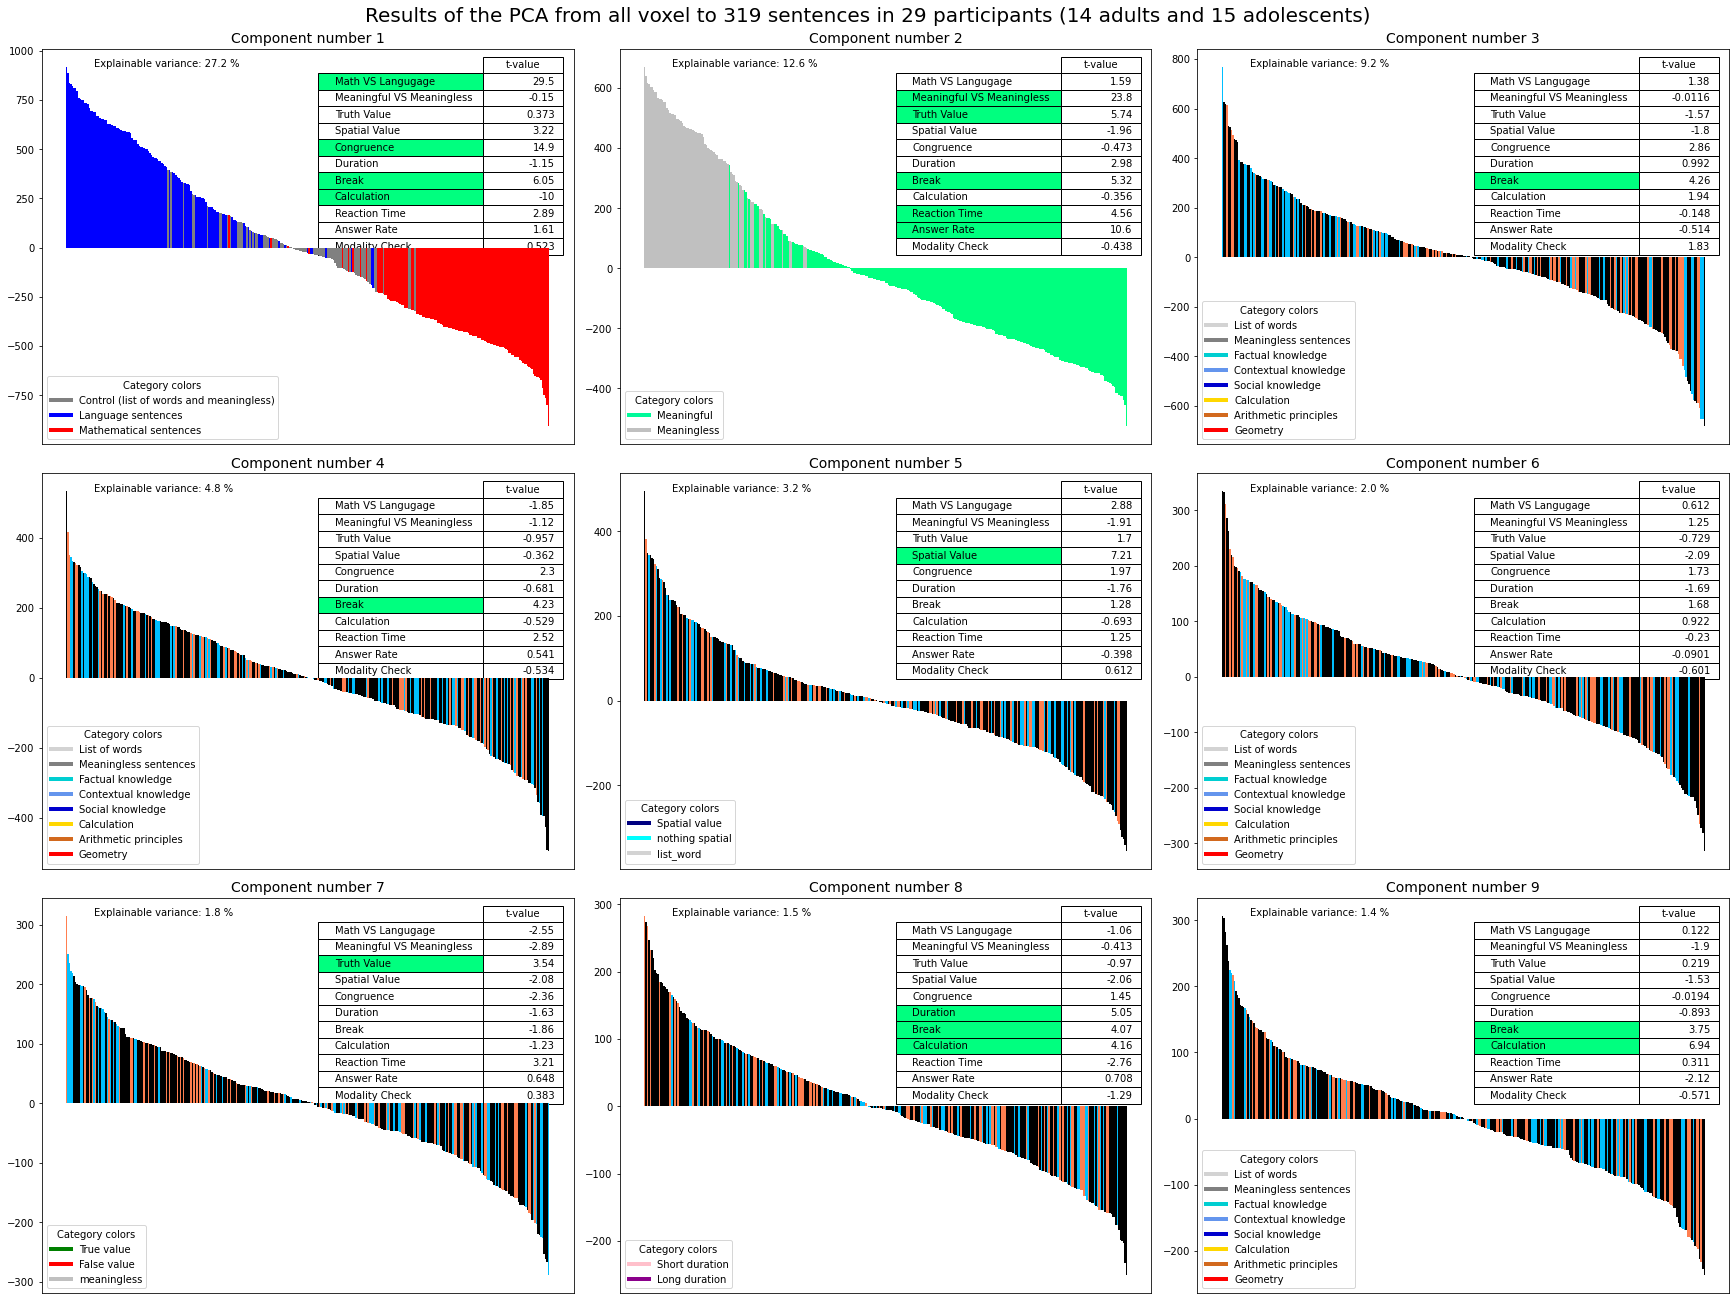

In [78]:
fig, axs = plt.subplots(3, 3, layout='constrained', figsize = (24,18))

axs[0,0].bar(names_0, values_0, color=bar_colors_0, label=bar_labels, width=1)
axs[0,0].set_title('Component number 1', size = 14)
axs[0,0].legend(custom_lines_mathvslang, bar_labels_mathvslang, title='Category colors', loc = 3, prop = { "size": 10})
axs[0,0].invert_xaxis()
axs[0,0].xaxis.set_visible(False)
axs[0,0].text(300,data_pca[:,0].max(),f'Explainable variance: {exp_var_pca[0]*100:.01f} %')
axs[0,0].table(cellText=student_0,colWidths=[0.15],rowLabels=row_labels,colLabels=col_labels,loc='upper right', rowColours= row_colors_0)
axs[0,1].bar(names_1, values_1, color=bar_colors_1, label=bar_labels, width=1)
axs[0,1].set_title('Component number 2', size = 14)
axs[0,1].legend(custom_lines_meaning, bar_labels_meaning, title='Category colors', loc = 3, prop = { "size": 10})
axs[0,1].invert_xaxis()
axs[0,1].xaxis.set_visible(False)
axs[0,1].text(300,data_pca[:,1].max(),f'Explainable variance: {exp_var_pca[1]*100:.01f} %')
axs[0,1].table(cellText=student_1,colWidths=[0.15],rowLabels=row_labels,colLabels=col_labels,loc='upper right', rowColours= row_colors_1)
axs[0,2].bar(names_2, values_2, color=bar_colors_2, label=bar_labels, width=1)
axs[0,2].set_title('Component number 3', size = 14)
axs[0,2].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
axs[0,2].invert_xaxis()
axs[0,2].xaxis.set_visible(False)
axs[0,2].text(300,data_pca[:,2].max(),f'Explainable variance: {exp_var_pca[2]*100:.01f} %')
axs[0,2].table(cellText=student_2,colWidths=[0.15],rowLabels=row_labels,colLabels=col_labels,loc='upper right', rowColours= row_colors_2)
axs[1,0].bar(names_3, values_3, color=bar_colors_3, label=bar_labels, width=1)
axs[1,0].set_title('Component number 4', size = 14)
axs[1,0].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
axs[1,0].invert_xaxis()
axs[1,0].xaxis.set_visible(False)
axs[1,0].text(300,data_pca[:,3].max(),f'Explainable variance: {exp_var_pca[3]*100:.01f} %')
axs[1,0].table(cellText=student_3,colWidths=[0.15],rowLabels=row_labels,colLabels=col_labels,loc='upper right', rowColours= row_colors_3)
axs[1,1].bar(names_4, values_4, color=bar_colors_4, label=bar_labels, width=1)
axs[1,1].set_title('Component number 5', size = 14)
axs[1,1].legend(custom_lines_space, bar_labels_space, title='Category colors', loc = 3, prop = { "size": 10})
axs[1,1].invert_xaxis()
axs[1,1].xaxis.set_visible(False)
axs[1,1].text(300,data_pca[:,4].max(),f'Explainable variance: {exp_var_pca[4]*100:.01f} %')
axs[1,1].table(cellText=student_4,colWidths=[0.15],rowLabels=row_labels,colLabels=col_labels,loc='upper right', rowColours= row_colors_4)
axs[1,2].bar(names_5, values_5, color=bar_colors_5, label=bar_labels, width=1)
axs[1,2].set_title('Component number 6', size = 14)
axs[1,2].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
axs[1,2].invert_xaxis()
axs[1,2].xaxis.set_visible(False)
axs[1,2].text(300,data_pca[:,5].max(),f'Explainable variance: {exp_var_pca[5]*100:.01f} %')
axs[1,2].table(cellText=student_5,colWidths=[0.15],rowLabels=row_labels,colLabels=col_labels,loc='upper right', rowColours= row_colors_5)
axs[2,0].bar(names_6, values_6, color=bar_colors_6, label=bar_labels, width=1)
axs[2,0].set_title('Component number 7', size = 14)
axs[2,0].legend(custom_lines_truth, bar_labels_truth, title='Category colors', loc = 3, prop = { "size": 10})
axs[2,0].invert_xaxis()
axs[2,0].xaxis.set_visible(False)
axs[2,0].text(300,data_pca[:,6].max(),f'Explainable variance: {exp_var_pca[6]*100:.01f} %')
axs[2,0].table(cellText=student_6,colWidths=[0.15],rowLabels=row_labels,colLabels=col_labels,loc='upper right', rowColours= row_colors_6)
axs[2,1].bar(names_7, values_7, color=bar_colors_7, label=bar_labels, width=1)
axs[2,1].set_title('Component number 8', size = 14)
axs[2,1].legend(custom_lines_duration, bar_labels_duration, title='Category colors', loc = 3, prop = { "size": 10})
axs[2,1].invert_xaxis()
axs[2,1].xaxis.set_visible(False)
axs[2,1].text(300,data_pca[:,7].max(),f'Explainable variance: {exp_var_pca[7]*100:.01f} %')
axs[2,1].table(cellText=student_7,colWidths=[0.15],rowLabels=row_labels,colLabels=col_labels,loc='upper right', rowColours= row_colors_7)
axs[2,2].bar(names_8, values_8, color=bar_colors_8, label=bar_labels, width=1)
axs[2,2].set_title('Component number 9', size = 14)
axs[2,2].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
axs[2,2].invert_xaxis()
axs[2,2].xaxis.set_visible(False)
axs[2,2].text(300,data_pca[:,8].max(),f'Explainable variance: {exp_var_pca[8]*100:.01f} %')
axs[2,2].table(cellText=student_8,colWidths=[0.15],rowLabels=row_labels,colLabels=col_labels,loc='upper right', rowColours= row_colors_8, alpha = 0)

fig.suptitle(f'Results of the PCA from all voxel to {n_sentences} sentences in {n_subj} participants (14 adults and 15 adolescents)', size =20)
plt.show()

### Understand each PC
PC1 : Maths VS Language

PC2 : in total participants is Meaningless VS Meaningfull

In [79]:
def look_sentences_PC(pca_sorted_dict):
    sentences_of_interest = np.empty((0,2))
    for i in list(pca_sorted_dict.keys())[-41:-1]: #[0,21][-21:-1]
        for j in range(sentence_details.shape[0]):
            if str(sentence_details[j,0]) == i:
                sentences_of_interest=np.vstack((sentences_of_interest,(sentence_details[j,0],sentence_details[j,1])))
    return(sentences_of_interest)

In [80]:
PC2_sentences = look_sentences_PC(pca_sorted_dict_1)
PC4_sentences = look_sentences_PC(pca_sorted_dict_3)
print(PC2_sentences)
print(bar_colors_1[-41:-1])

[['167' "D'après où dans ils les d'une toute cependant et sans."]
 ['169' 'Chaque dès duquel de en tous eux mais ou ont celle.']
 ['191' 'Période histoire visage pleine côté conditions jamais.']
 ['177' 'On que toute sur est une afin le de tandis en pourquoi.']
 ['109' 'Le lapin de mal va vite au bal du camion doux.']
 ['189' 'Insigne doux colline biberon écrit blanc couper.']
 ['85'
  'Pour charger la décision pluvieuse est un inconvénient sans fauteuil.']
 ['197' 'Nombre voie assemblée parfois épaules peinture avions.']
 ['111' 'L’espoir d’oignon lisse et brun fait joli et gras.']
 ['118' 'La pitié est débitée au roi du canard en petites montres.']
 ['192' 'Souvent été car double esprit dos jeune relations doute.']
 ['171' 'Selon alors auxquelles aux sur cette dans les est car ses.']
 ['100' 'Une mélancolie offre de piloter le pouvoir à ses savons chauds.']
 ['91' 'Aux champs bleus les couvertures inversibles sont brutaux.']
 ['174' 'La est alors les par puisque de se près même je eu

In [114]:
'''create sub-categories'''
## calculation & arithmetic principles: Fraction, addition, substraction, comparison, division, square root
fraction = [13,15,18,25,26,37,17,52,57,58,75,76,77]
addition = [3,14,29,43,49,50,55,67,70]
substraction = [1,2,11,19,32,45,61,64,68,71,74]
division = [5,16,21,24,30,38,48,43,54,69,79]
multiplication = [4,6,7,9,10,12,20,27,28,31,35,36,40,41,42,46,47,51,56,65,66,72,80]
comparison = [33,34,39,44]
square = [8,22,23,59,60,63,78]
even = [62,73]

## colorless green: condition or not
condition = list(range(84,95))
other = [81,82,83]+list(range(95,121))

## context geography or religion, person:
geography_country_town = [121,122,123,124,125,126,128,129,130,131,133,135,136,137,139,140,142,144,147,148,149,151,152,153,154,155,156,158,159,160]
geography_planet_size = [145,146,157]
religion = [127,132,134,141,143]
other = [138,150]

## list of words: grammar, nouns
grammar = list(range(161,181))
nouns = list(range(181,201))

## general : animal, botanic, chemistry, planets,
animal = [201,203,205,206,208,214,221,222,223,224,228,229,231]
botanic= [202,215,216,225]
chemistry_physics = [204,209,210,232]
planets_time = [207,217,218,226,227,233,234,235,236,238,239,240]
books = [212,213,230,237]
biology = [212,219,220]

## Geometry : geometrical_shapes (square, triangle, rectangle), lines
squares = [241,243,247,251,253,258,259,260,266,278]
triangle = [242,250,264,269,272,273,274,275]
other_shapes = [244,252,257,262,263,268,270,271,277]
lines_angles = [245,246,248,265,276,279]
circles = [249,254,255,256,261,267]

##Tom :
scientist = [281,282,284,286,287,288,316,320]
writer = [283,285,303,313,319]
historical_people = [289,298,301,309,312,315,317,318]
current_people = [290,294,295,302,304,305,307,310,311,314]
fiction_people = [297,300,308]
religious = [291,292,293,296,299,306]

In [81]:
def clickselection():
    '''Fonction qui permet à un joueur humain de sélectionner sa première case directement sur l'interface graphique
    ENTREE: pas d'entrée
    SORTIE: coordonnées de la case sélectionnée'''
    z1=plt.ginput(1,timeout=0)          # permet de cliquer sur 1 point sans temps d'intervalle entre deux points "cliqués"
    X1=m.floor(z1[0][1])                # repère la coordonnée en abscisse
    Y1=m.floor(z1[0][0])                # repère la coordonnée en ordonnée 
    return X1,Y1

In [118]:
bar_colors_scatter =[]
calculation = []
arithmetic = []
colorlessg = []
context = []
list_of_words=[]
general = []
geometry =[]
social =[]
religion_list = []
fraction_list = []
angle_list = []

## colorless green: condition or not
condition = list(range(84,95))
other = [81,82,83]+list(range(95,121))

religion = [127,132,134,141,143,290,291,292,295,298,305]

for i in range(1,data_pca.shape[0]+1):
    if i> 0 and i < 41 and len(bar_colors_scatter)<320:
        bar_colors_scatter.append('gold')
        calculation.append((data_pca[i-1,0],data_pca[i-1,1],data_pca[i-1,2],data_pca[i-1,3],data_pca[i-1,4],data_pca[i-1,5],data_pca[i-1,6],data_pca[i-1,7],data_pca[i-1,8]))
    if i> 40 and i < 81:
        bar_colors_scatter.append('chocolate')
        arithmetic.append((data_pca[i-1,0],data_pca[i-1,1],data_pca[i-1,2],data_pca[i-1,3],data_pca[i-1,4],data_pca[i-1,5],data_pca[i-1,6],data_pca[i-1,7],data_pca[i-1,8]))
    if i> 80 and i < 121:
        bar_colors_scatter.append('grey')
        colorlessg.append((data_pca[i-1,0],data_pca[i-1,1],data_pca[i-1,2],data_pca[i-1,3],data_pca[i-1,4],data_pca[i-1,5],data_pca[i-1,6],data_pca[i-1,7],data_pca[i-1,8]))
    if i> 120 and i < 161:
        bar_colors_scatter.append('cornflowerblue')
        context.append((data_pca[i-1,0],data_pca[i-1,1],data_pca[i-1,2],data_pca[i-1,3],data_pca[i-1,4],data_pca[i-1,5],data_pca[i-1,6],data_pca[i-1,7],data_pca[i-1,8]))
    if i> 160 and i < 201:
        bar_colors_scatter.append('lightgrey')
        list_of_words.append((data_pca[i-1,0],data_pca[i-1,1],data_pca[i-1,2],data_pca[i-1,3],data_pca[i-1,4],data_pca[i-1,5],data_pca[i-1,6],data_pca[i-1,7],data_pca[i-1,8]))
    if i> 200 and i < 241:
        bar_colors_scatter.append('darkturquoise')
        general.append((data_pca[i-1,0],data_pca[i-1,1],data_pca[i-1,2],data_pca[i-1,3],data_pca[i-1,4],data_pca[i-1,5],data_pca[i-1,6],data_pca[i-1,7],data_pca[i-1,8]))
    if i> 240 and i < 280:
        bar_colors_scatter.append('red')
        geometry.append((data_pca[i-1,0],data_pca[i-1,1],data_pca[i-1,2],data_pca[i-1,3],data_pca[i-1,4],data_pca[i-1,5],data_pca[i-1,6],data_pca[i-1,7],data_pca[i-1,8]))
    if i> 279 and i < 320:
        bar_colors_scatter.append('mediumblue')
        social.append((data_pca[i-1,0],data_pca[i-1,1],data_pca[i-1,2],data_pca[i-1,3],data_pca[i-1,4],data_pca[i-1,5],data_pca[i-1,6],data_pca[i-1,7],data_pca[i-1,8]))


def selection_point(first_pc, second_pc):
    X, Y = clickselection()
    point=(Y,X)
    list_distance = 1000
    sentence = ''
    compt = 0
    for i in range(1,data_pca.shape[0]+1):
        sentence_coord = (data_pca[i-1,first_pc-1], data_pca[i-1,second_pc-1])
        if list_distance >= m.dist(point,sentence_coord):
            list_distance= m.dist(point,sentence_coord)
            sentence = sentence_details[i-1,1]
            num_sentence = i
        elif int(X)<data_pca[:,second_pc-1].min() and int(Y<data_pca[:,first_pc-1].min()+50):
            compt = 1
            sentence = 'exit'
            num_sentence = 0
    return sentence,num_sentence, compt

def compute_ellipsoid(all_points_coordinates,first_pc,second_pc):
    PC_first = [all_points_coordinates[i][first_pc-1] for i in range(len(all_points_coordinates))]
    PC_second = [all_points_coordinates[i][second_pc-1] for i in range(len(all_points_coordinates))]
    x=np.mean(PC_first)
    y=np.mean(PC_second)
    cov = np.cov(PC_first,PC_second)
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = eigvecs[:,0][0], eigvecs[:,0][1]
    angle = np.arctan2(vy, vx)
    width, height = 2 * 2 * np.sqrt(eigvals)
    return x,y,width,height,angle

def plot_scatter_plot(point,num_sentence, first_pc, second_pc):
    fig = plt.figure(figsize = (15,8))
    plt.clf()
    labels=['List of words','Meaningless sentences','General Knowledge','Contextual Knowledge','Social Knowledge','Calculation', 'Arithmetic',  'Geometry']
    ax = fig.add_subplot()
    alpha = 0.1
    e1 = Ellipse((compute_ellipsoid(calculation,first_pc,second_pc)[0], compute_ellipsoid(calculation,first_pc,second_pc)[1]), compute_ellipsoid(calculation,first_pc,second_pc)[2], 
                 compute_ellipsoid(calculation,first_pc,second_pc)[3], angle=compute_ellipsoid(calculation,first_pc,second_pc)[4], linewidth=1, fill=True, zorder=10, edgecolor='k', facecolor = 'gold', alpha = alpha)
    e2 = Ellipse((compute_ellipsoid(arithmetic,first_pc,second_pc)[0], compute_ellipsoid(arithmetic,first_pc,second_pc)[1]), compute_ellipsoid(arithmetic,first_pc,second_pc)[2], 
                 compute_ellipsoid(arithmetic,first_pc,second_pc)[3], angle=compute_ellipsoid(arithmetic,first_pc,second_pc)[4], linewidth=1, fill=True, zorder=30, edgecolor='k', facecolor = 'chocolate', alpha = alpha)
    e3 = Ellipse((compute_ellipsoid(colorlessg,first_pc,second_pc)[0], compute_ellipsoid(colorlessg,first_pc,second_pc)[1]), compute_ellipsoid(colorlessg,first_pc,second_pc)[2], 
                 compute_ellipsoid(colorlessg,first_pc,second_pc)[3],angle=compute_ellipsoid(colorlessg,first_pc,second_pc)[4], linewidth=1, fill=True, zorder=30, edgecolor='k', facecolor = 'grey', alpha = alpha)
    e4 = Ellipse((compute_ellipsoid(context,first_pc,second_pc)[0], compute_ellipsoid(context,first_pc,second_pc)[1]), compute_ellipsoid(context,first_pc,second_pc)[2], 
                 compute_ellipsoid(context,first_pc,second_pc)[3],angle=compute_ellipsoid(context,first_pc,second_pc)[4], linewidth=1, fill=True, zorder=30, edgecolor='k', facecolor = 'cornflowerblue', alpha = alpha)
    e5 = Ellipse((compute_ellipsoid(list_of_words,first_pc,second_pc)[0], compute_ellipsoid(list_of_words,first_pc,second_pc)[1]), compute_ellipsoid(list_of_words,first_pc,second_pc)[2], 
                 compute_ellipsoid(list_of_words,first_pc,second_pc)[3],angle=compute_ellipsoid(list_of_words,first_pc,second_pc)[4], linewidth=1, fill=True, zorder=30, edgecolor='k', facecolor = 'lightgrey', alpha = alpha)
    e6 = Ellipse((compute_ellipsoid(general,first_pc,second_pc)[0], compute_ellipsoid(general,first_pc,second_pc)[1]), compute_ellipsoid(general,first_pc,second_pc)[2], 
                 compute_ellipsoid(general,first_pc,second_pc)[3],angle=compute_ellipsoid(general,first_pc,second_pc)[4], linewidth=1, fill=True, zorder=30, edgecolor='k', facecolor = 'darkturquoise', alpha = alpha)
    e7 = Ellipse((compute_ellipsoid(geometry,first_pc,second_pc)[0], compute_ellipsoid(geometry,first_pc,second_pc)[1]), compute_ellipsoid(geometry,first_pc,second_pc)[2],
                  compute_ellipsoid(geometry,first_pc,second_pc)[3],angle=compute_ellipsoid(geometry,first_pc,second_pc)[4], linewidth=1, fill=True, zorder=10, edgecolor='k', facecolor = 'red', alpha = alpha)
    e8 = Ellipse((compute_ellipsoid(social,first_pc,second_pc)[0], compute_ellipsoid(social,first_pc,second_pc)[1]), compute_ellipsoid(social,first_pc,second_pc)[2], 
                 compute_ellipsoid(social,first_pc,second_pc)[3],angle=compute_ellipsoid(social,first_pc,second_pc)[4], linewidth=1, fill=True, zorder=30, edgecolor='k', facecolor = 'mediumblue', alpha = alpha)

    ax.add_patch(e5)
    ax.add_patch(e3)
    ax.add_patch(e6)
    ax.add_patch(e4)
    ax.add_patch(e8)
    ax.add_patch(e1)
    ax.add_patch(e2)
    ax.add_patch(e7)
    #ax.legend(loc='upper right', scatterpoints=2, labels = labels, framealpha = 1)

    # colours = ['lightgrey','gold', 'chocolate', 'grey','darkturquoise', 'cornflowerblue','red', 'mediumblue']
    plt.text(data_pca[:,first_pc-1].min(),data_pca[:,second_pc-1].max() , point, size=15,color='k')
    print(point)
    plt.plot([data_pca[:,first_pc-1].min(),data_pca[:,first_pc-1].min(),data_pca[:,first_pc-1].min()+50,data_pca[:,first_pc-1].min()+50,data_pca[:,first_pc-1].min()],
             [data_pca[:,second_pc-1].min(),data_pca[:,second_pc-1].min()-50,data_pca[:,second_pc-1].min()-50,data_pca[:,second_pc-1].min(),data_pca[:,second_pc-1].min()],'k',linewidth=1) # forme le bouton d'arrêt
    plt.scatter(data_pca[:,first_pc-1], data_pca[:,second_pc-1],c=bar_colors_scatter, alpha=1)
    plt.title(f'Scatter Plot of PC{first_pc} versus PC{second_pc} in 29 participants')
    plt.xlabel(f'PC{first_pc}')
    plt.ylabel(f'PC{second_pc}')
    plt.legend(custom_lines,labels,loc = 'upper right')
    #plt.style.use("black_background")
    plt.draw()
    #plt.show(block=False)
    plt.pause(0.001)

In [83]:
data_pca[:,1].max()

670.5367054484677

In [119]:
%matplotlib qt
def print_sentence_plot(first_pc,second_pc):
    plot_scatter_plot('','',first_pc,second_pc)
    compt = 0
    while compt==0:
        sentence, num_sentence, compt = selection_point(first_pc,second_pc)
        plt.close()
        plot_scatter_plot(sentence,num_sentence,first_pc,second_pc)
    plt.close()
    return 'exit'

print_sentence_plot(1,2)


exit


'exit'

In [62]:
def data_per_PCA(category_data):
    PC1 = [category_data[i][0] for i in range(len(category_data))]
    PC2 = [category_data[i][1] for i in range(len(category_data))]
    PC3 = [category_data[i][2] for i in range(len(category_data))]
    PC4 = [category_data[i][3] for i in range(len(category_data))]
    PC5 = [category_data[i][4] for i in range(len(category_data))]
    PC6 = [category_data[i][5] for i in range(len(category_data))]
    PC7 = [category_data[i][6] for i in range(len(category_data))]
    PC8 = [category_data[i][7] for i in range(len(category_data))]
    PC9 = [category_data[i][8] for i in range(len(category_data))]
    return PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9

In [95]:
print(len(data_per_PCA(calculation)[0]))

40


In [67]:
def find_outlier_values(category_data,numPCA, threshold):
    outlier_sentences = []
    for i in range(0,len(category_data)):
        if category_data[i][numPCA-1]>threshold:
            outlier_sentences.append(sentence_details[i,1])
            print(data_pca[i,0],data_pca[i,numPCA-1])
    return outlier_sentences

print(find_outlier_values(calculation,3,220))

-406.2538564973297 266.72800675100433
-250.4891628233771 357.50675623776385
['Le produit de trois par sept a comme résultat vingt et un.', 'Le nombre douze multiplié par dix fait cent vingt.']


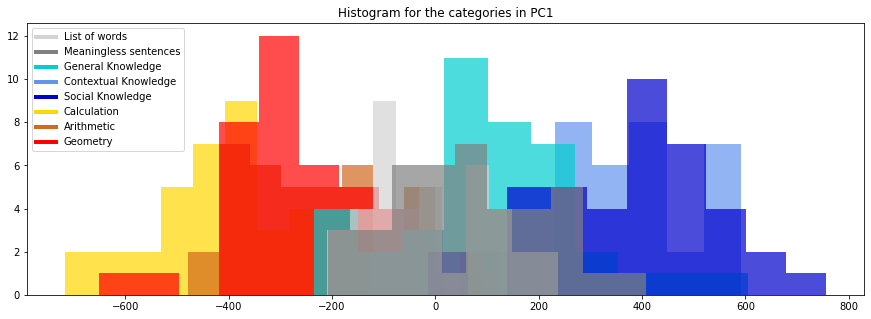

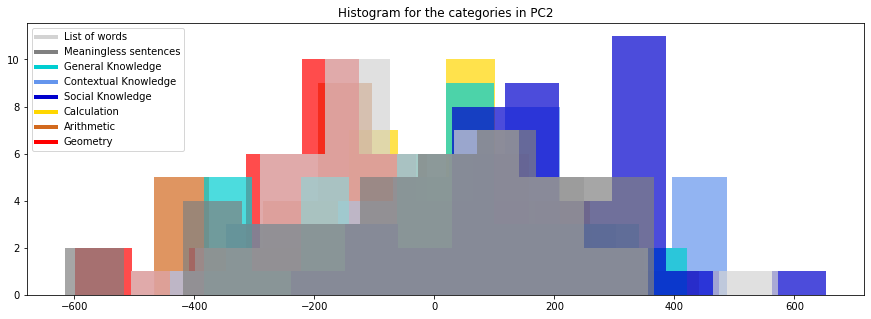

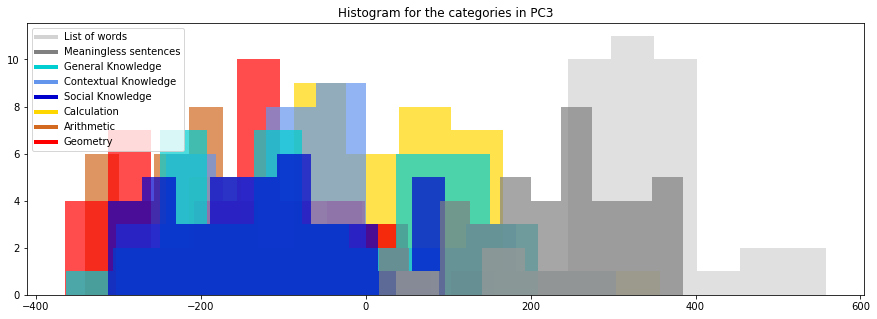

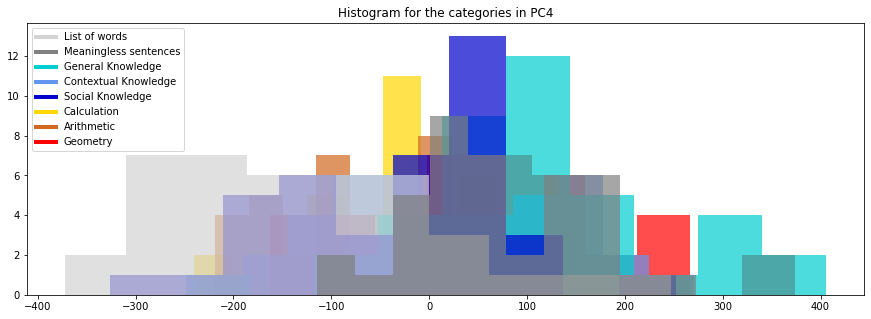

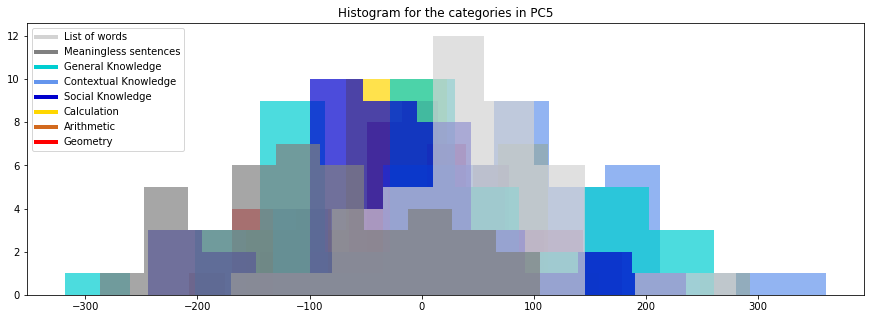

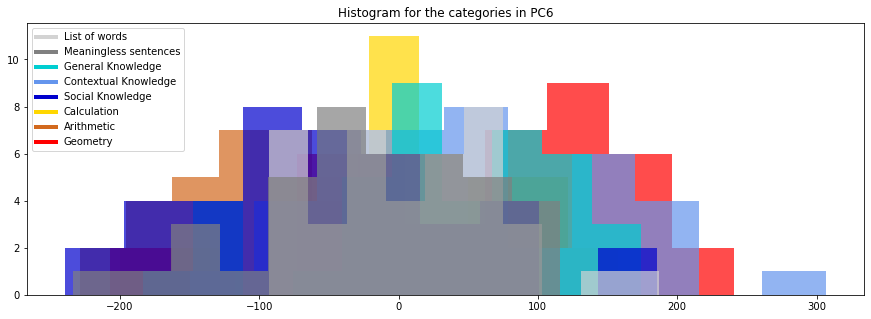

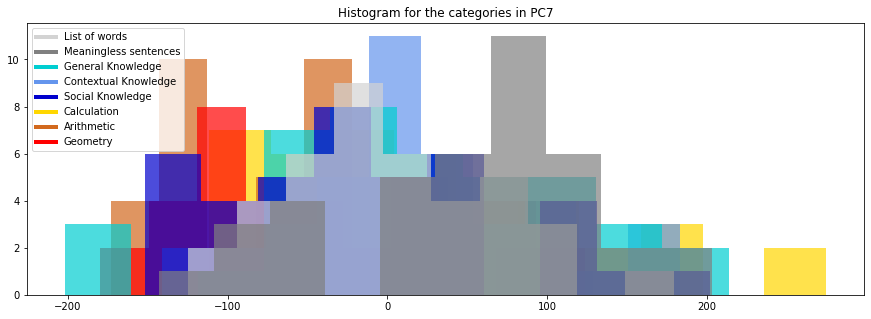

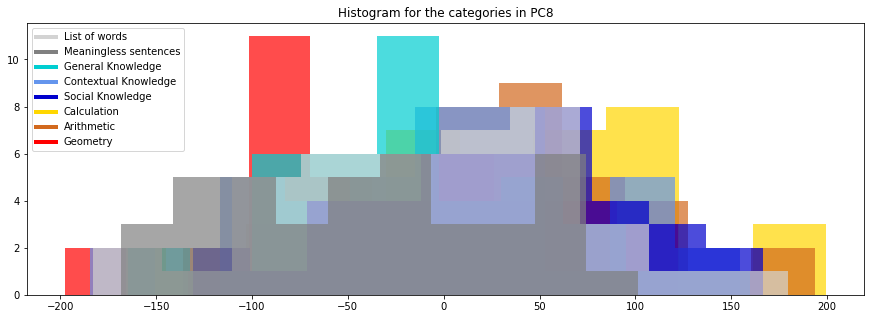

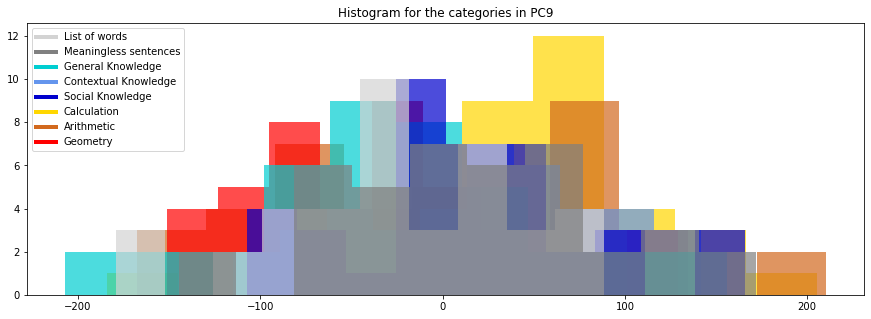

In [68]:
for i in range(0,9):
    plt.figure(figsize=(15,5))
    plt.hist(data_per_PCA(calculation)[i],bins = 10, color='gold',alpha=0.7)
    plt.hist(data_per_PCA(arithmetic)[i],bins = 10, color='chocolate',alpha=0.7)
    plt.hist(data_per_PCA(geometry)[i],bins = 10, color='red',alpha=0.7)
    plt.hist(data_per_PCA(context)[i],bins = 10, color='cornflowerblue',alpha=0.7)
    plt.hist(data_per_PCA(general)[i],bins = 10, color='darkturquoise',alpha=0.7)
    plt.hist(data_per_PCA(social)[i],bins = 10, color='mediumblue',alpha=0.7)
    plt.hist(data_per_PCA(list_of_words)[i],bins = 10, color='lightgrey',alpha=0.7)
    plt.hist(data_per_PCA(colorlessg)[i],bins = 10, color='grey',alpha=0.7)
    plt.legend(custom_lines,labels, loc='upper left')
    plt.title(f'Histogram for the categories in PC{i+1}')
    plt.show()

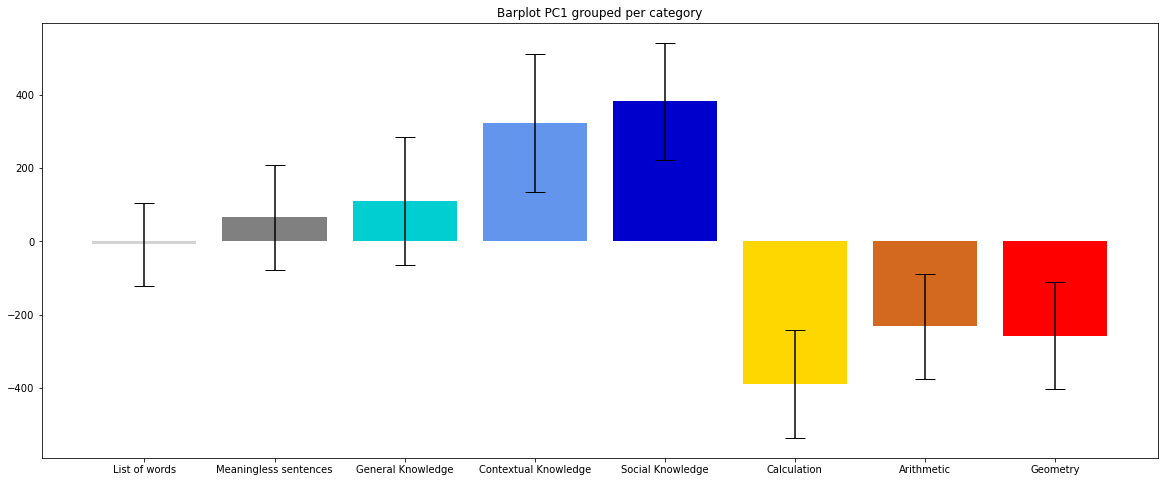

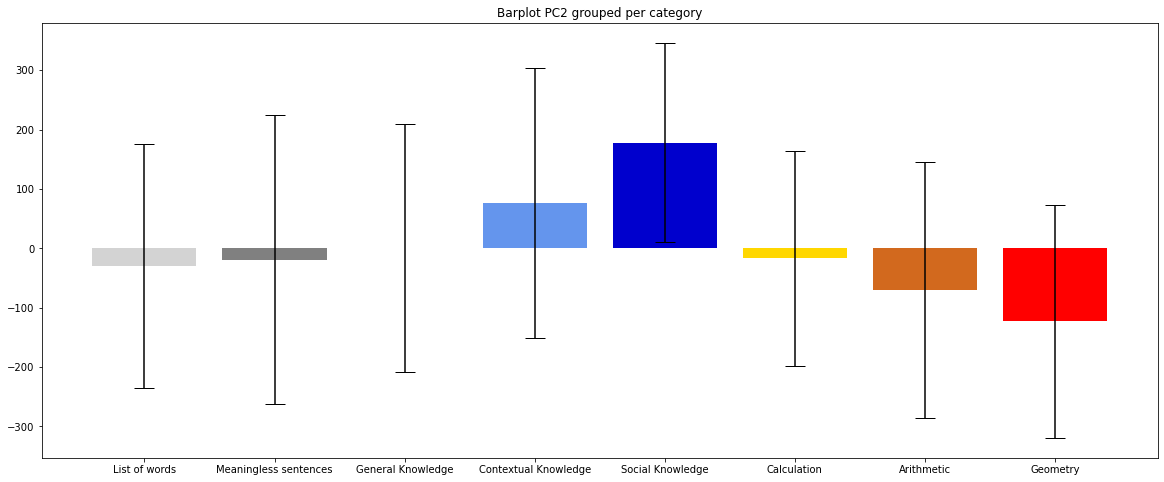

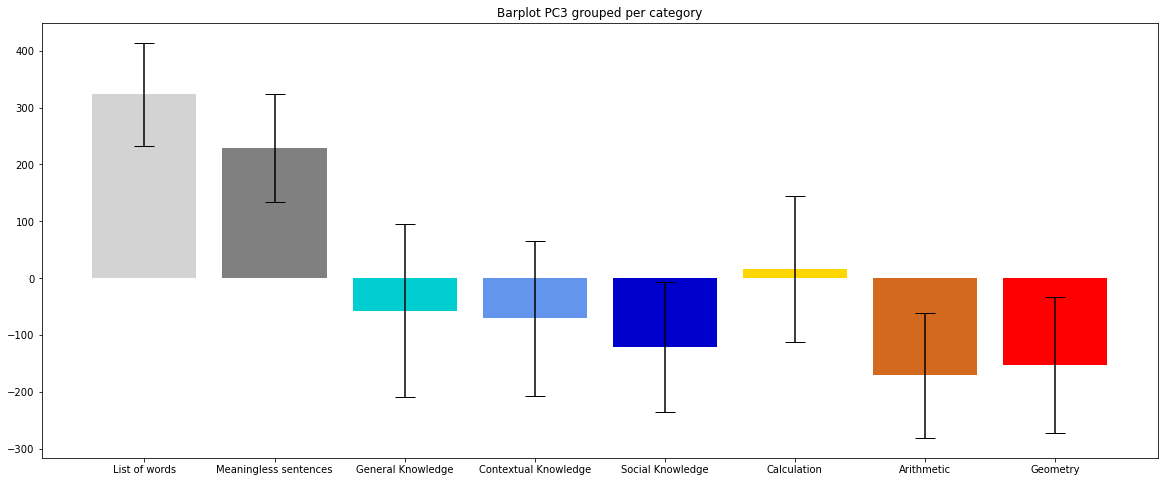

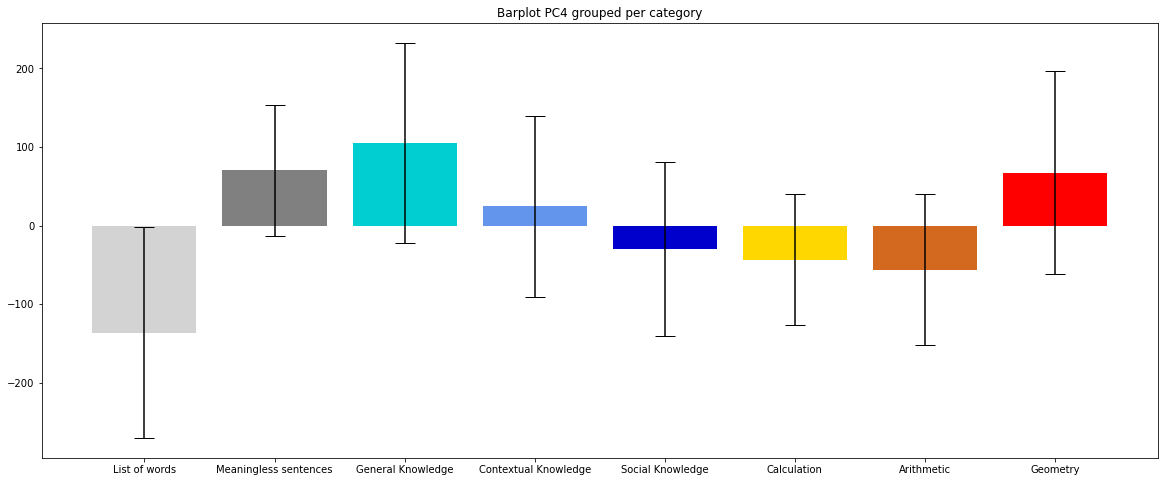

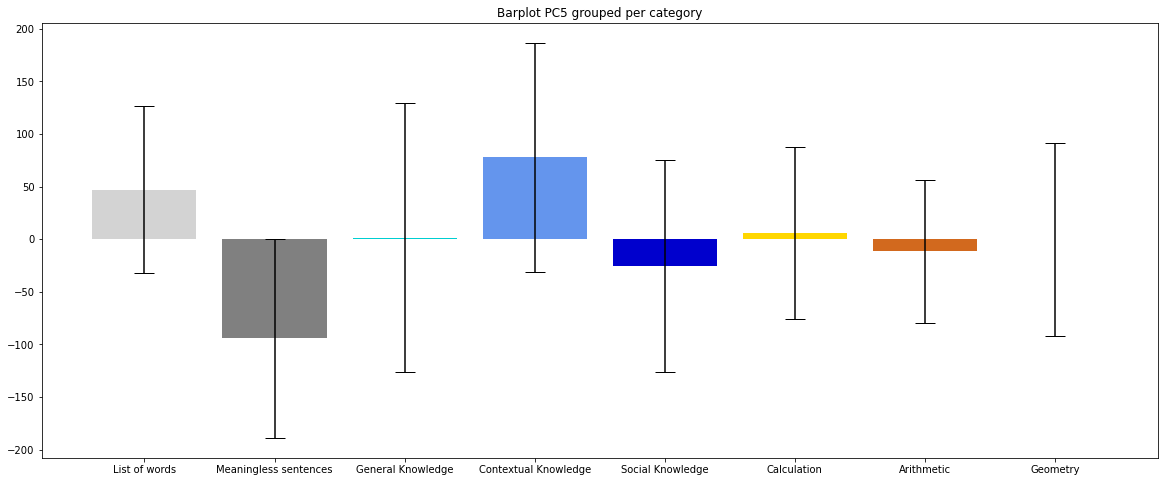

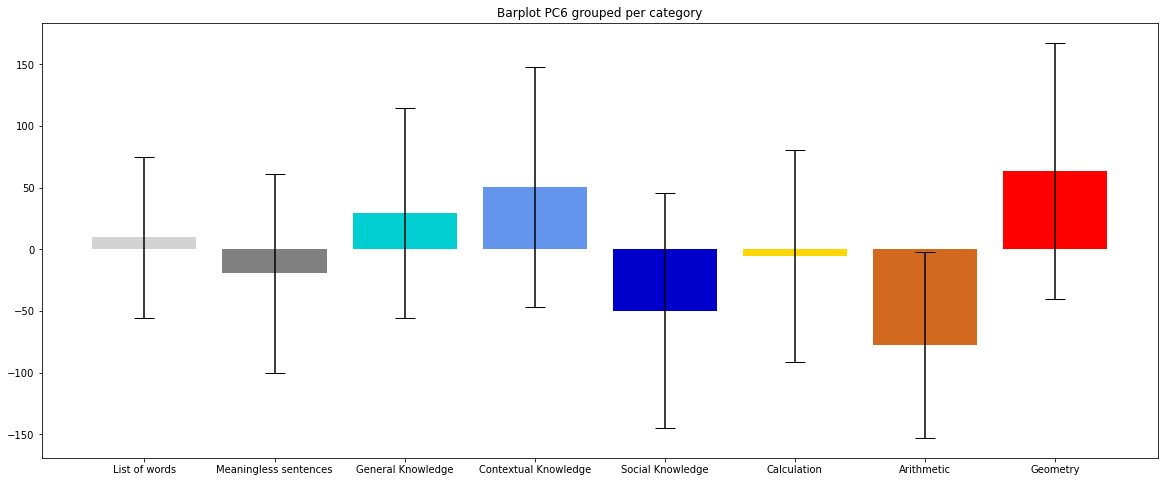

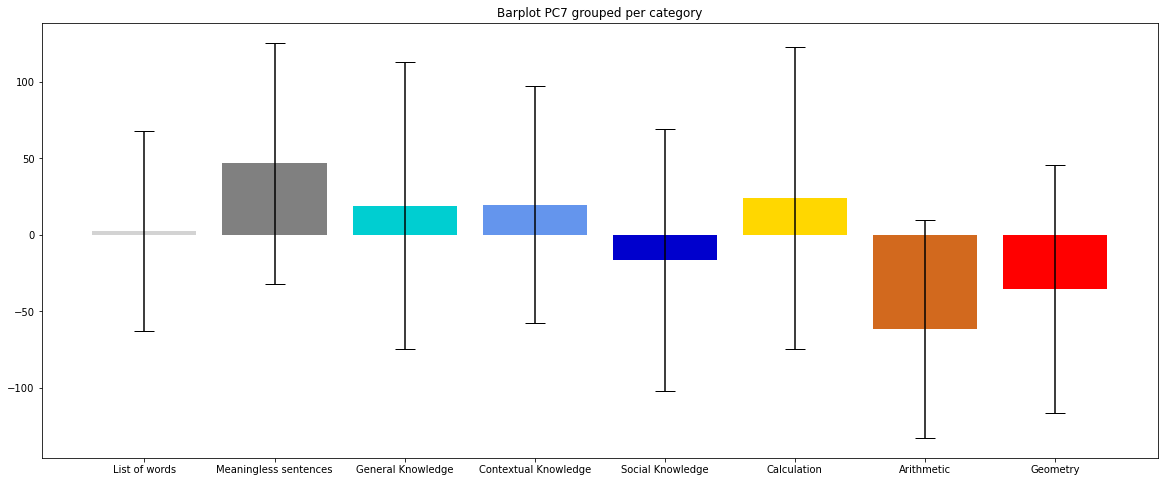

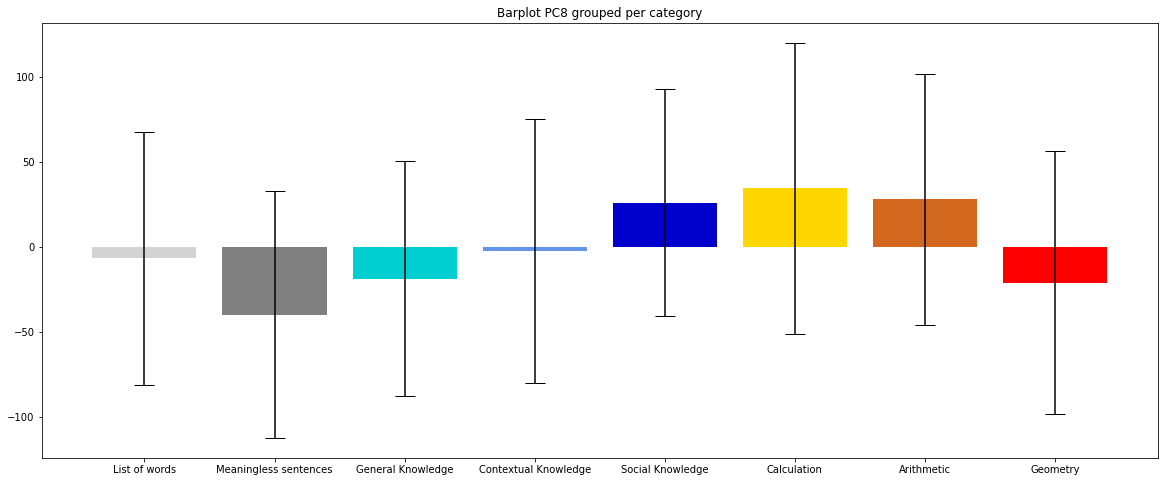

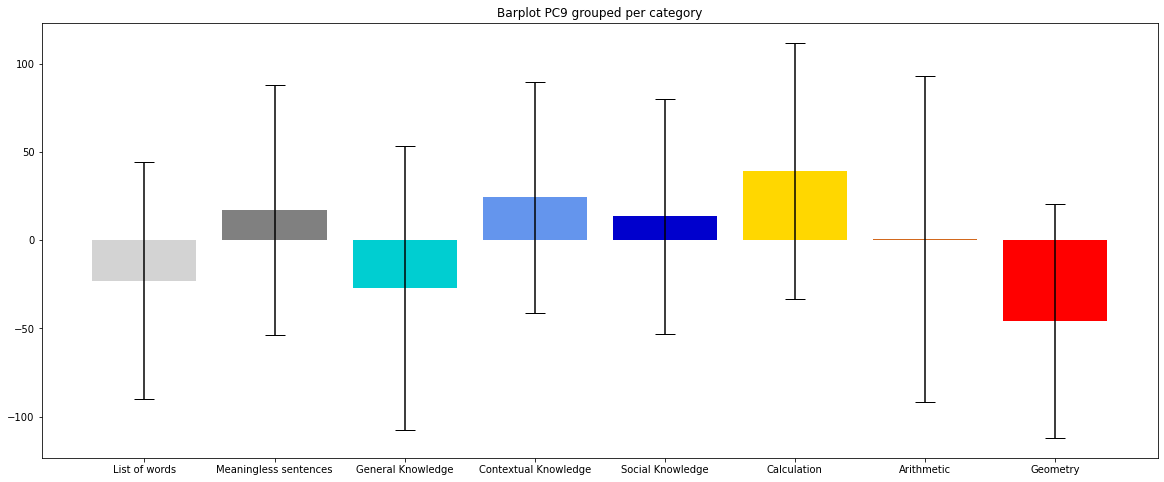

In [69]:
for i in range(0,9):
    names = ['List of words','Meaningless sentences','General Knowledge','Contextual Knowledge','Social Knowledge','Calculation', 'Arithmetic',  'Geometry']
    mean_list, std_list = np.mean(data_per_PCA(list_of_words)[i]), np.std(data_per_PCA(list_of_words)[i])
    mean_colorlessg, std_colorlessg = np.mean(data_per_PCA(colorlessg)[i]), np.std(data_per_PCA(colorlessg)[i])
    mean_general, std_general = np.mean(data_per_PCA(general)[i]), np.std(data_per_PCA(general)[i])
    mean_context, std_context =np.mean(data_per_PCA(context)[i]), np.std(data_per_PCA(context)[i])
    mean_social, std_social = np.mean(data_per_PCA(social)[i]), np.std(data_per_PCA(social)[i])
    mean_calculation, std_calculation = np.mean(data_per_PCA(calculation)[i]), np.std(data_per_PCA(calculation)[i])
    mean_arithmetic, std_arithmetic = np.mean(data_per_PCA(arithmetic)[i]), np.std(data_per_PCA(arithmetic)[i])
    mean_geometry, std_geometry = np.mean(data_per_PCA(geometry)[i]), np.std(data_per_PCA(geometry)[i])
    means = [mean_list,mean_colorlessg,mean_general,mean_context,mean_social,mean_calculation,mean_arithmetic,mean_geometry]
    std = [std_list,std_colorlessg,std_general,std_context,std_social,std_calculation,std_arithmetic,std_geometry]
    bar_color_barplot = ['lightgrey','grey','darkturquoise','cornflowerblue','mediumblue','gold','chocolate','red']
    plt.figure(figsize=(20,8))
    plt.bar(names,means, yerr = std, alpha=1, ecolor='black', capsize=10, color = bar_color_barplot)
    plt.title(f'Barplot PC{i+1} grouped per category')
    plt.show()

In [165]:
PC1 = [calculation[i][0] for i in range(len(calculation))]
PC2 = [calculation[i][1] for i in range(len(calculation))]
cov = np.cov(PC1,PC2)
eigvals, eigvecs = np.linalg.eigh(cov)
order = eigvals.argsort()[::-1]
eigvals, eigvecs = eigvals[order], eigvecs[:, order]

# The anti-clockwise angle to rotate our ellipse by 
vx, vy = eigvecs[:,0][0], eigvecs[:,0][1]
theta = np.arctan2(vy, vx)
width, height = 2 * 3 * np.sqrt(eigvals)

print(width,height,theta)

1079.9628476317332 714.4923549232351 1.0933083032146256


In [253]:
print(np.max(PC2))

342.9174737156873


Ttest_indResult(statistic=-5.470914108031609, pvalue=1.6344326098950228e-07)


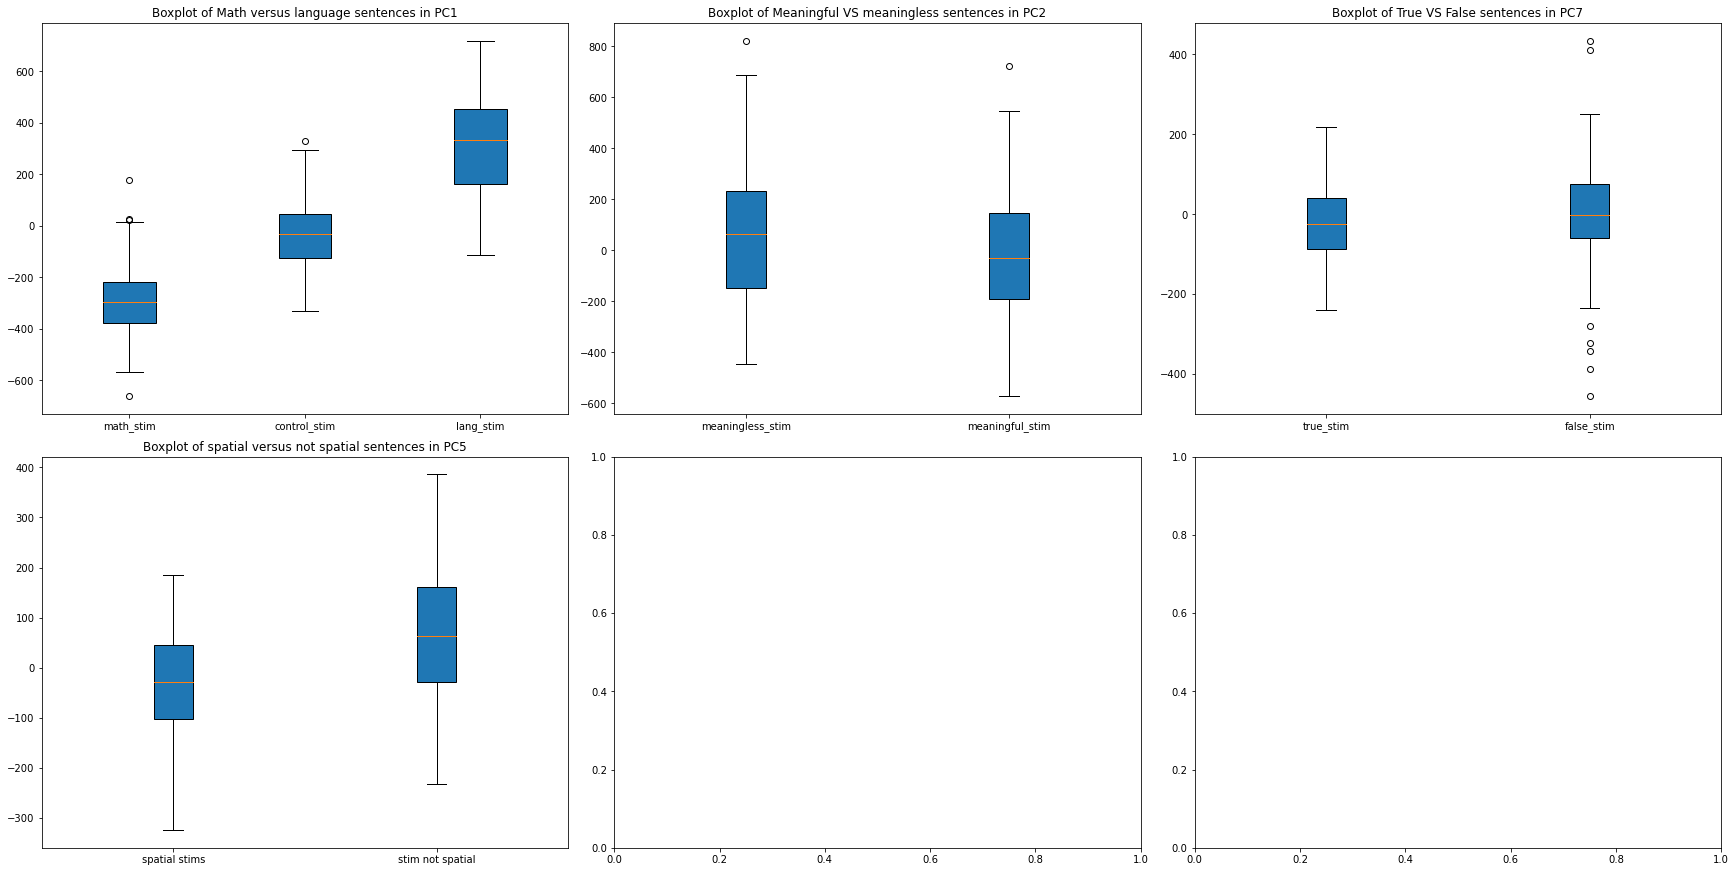

In [43]:
math_stim = list(data_pca[0:80,0])+list(data_pca[240:279,0])
lang_stim = list(data_pca[120:160,0])+list(data_pca[200:240,0])+list(data_pca[279:319,0])
control_stim = list(data_pca[80:120,0])+list(data_pca[160:200,0])

meaningless_stim = list(data_pca[80:121,1])+list(data_pca[160:201,1])
meaningful_stim = list(data_pca[0:81,1])+list(data_pca[240:281,1])+list(data_pca[120:161,1])+list(data_pca[200:241,1])+list(data_pca[279:320,1])

true_value = list(data_pca[0:20,6])+list(data_pca[40:60,6])+list(data_pca[240:260,6])+list(data_pca[120:140,6])+list(data_pca[200:220,6])+list(data_pca[279:299,6])
false_value = list(data_pca[20:40,1])+list(data_pca[60:80,6])+list(data_pca[260:279,6])+list(data_pca[140:160,6])+list(data_pca[220:240,6])+list(data_pca[299:319,6])

not_spatial = [44,237,232,114,91,92,103,45,56,57,58,62,73,77,90,106,107,108,110,111,112,113,115,127,132,134,138,150,206,228,230,231,233,234,235,281,283,284,285,288,289,292,293,295,296,297,298,300,301,302,304,306,307,308,310,311,313]+list(range(81,89))+list(range(93,103))+list(range(117,121))+list(range(201,205))+list(range(209,218))+list(range(219,226))+list(range(315,320))
not_spatial_stim=[data_pca[i-1,4] for i in not_spatial ]
spatial = [89,282,299,312,104,105,109,116,128,129,130,131,133,135,136,137,205,207,208,218,226,227,229,236,238,239,240,286,287,290,291,294,303,305,309,314]+list(range(121,127))+list(range(139,150))+list(range(151,161))
spatial_stim=[data_pca[i-1,4] for i in spatial ]

student_spatial=ttest_ind(not_spatial_stim, spatial_stim)
print(student_spatial)

fig, axs = plt.subplots(2, 3, layout='constrained', figsize = (24,12))

mathVSlang_data = [math_stim, control_stim, lang_stim]
meaningful_data = [meaningless_stim, meaningful_stim]
truth_data = [true_value, false_value]
spatial_data = [not_spatial_stim,spatial_stim]

labels_mathvslang = ['math_stim', 'control_stim', 'lang_stim']
labels_meaning = ['meaningless_stim', 'meaningful_stim']
labels_truth = ['true_stim', 'false_stim']
labels_spatial = ['spatial stims', 'stim not spatial']

#MultipleBoxplot
axs[0,0].boxplot(mathVSlang_data, vert=True, patch_artist=True, labels=labels_mathvslang) 
axs[0,0].set_title('Boxplot of Math versus language sentences in PC1')
axs[0,1].boxplot(meaningful_data, vert=True, patch_artist=True, labels=labels_meaning) 
axs[0,1].set_title('Boxplot of Meaningful VS meaningless sentences in PC2')
axs[0,2].boxplot(truth_data, vert=True, patch_artist=True, labels=labels_truth) 
axs[0,2].set_title('Boxplot of True VS False sentences in PC7')
axs[1,0].boxplot(spatial_data, vert=True, patch_artist=True, labels=labels_spatial) 
axs[1,0].set_title('Boxplot of spatial versus not spatial sentences in PC5')
plt.show()

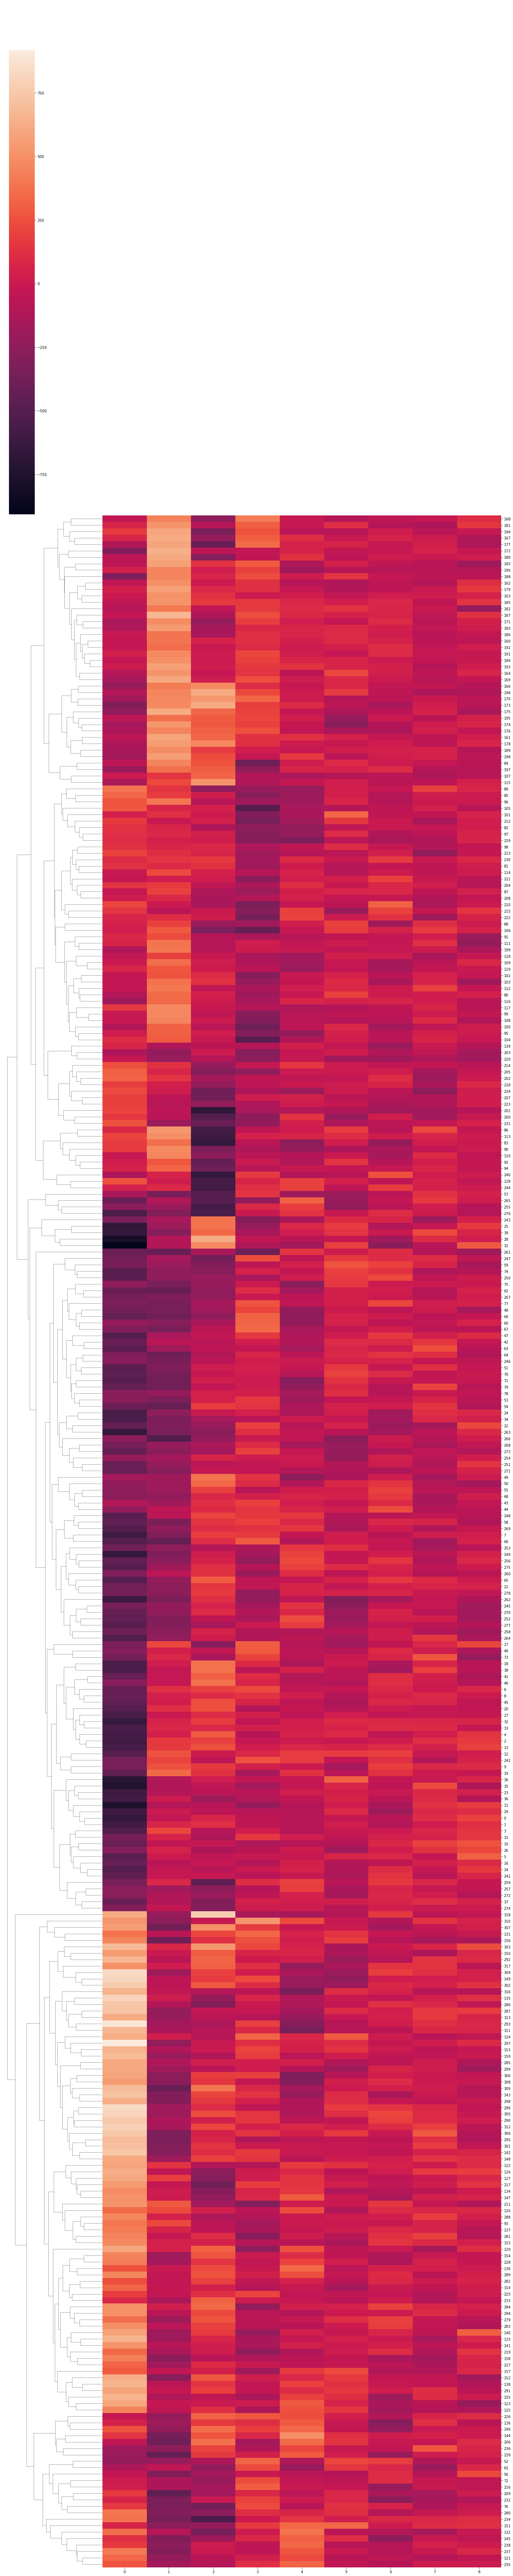

In [34]:
sns.clustermap(data_pca[:,0:9], col_cluster =False, figsize = (20,100))

In [243]:
#test on the 7th component
names = pca_sorted_dict_1.keys()
values = pca_sorted_dict_1.values()

T_value =[]
for i in names:
    for j in range(sentence_details.shape[0]):
        if int(sentence_details[j,0]) == int(i):
            if sentence_details[j,3] == bool(True) and len(T_value)<320:
                T_value.append(True)
            elif sentence_details[j,3] == bool(False) and sentence_details[j,4]== 'Meaningful' and len(T_value)<320:
                T_value.append(False)
            else:
                T_value.append('meaningless')
print(names)
print(list(values))
print(len(T_value))

dict_keys(['268', '210', '67', '63', '240', '55', '311', '262', '157', '207', '65', '70', '80', '72', '309', '49', '145', '71', '68', '235', '247', '76', '58', '78', '35', '263', '54', '59', '264', '297', '77', '308', '233', '23', '250', '269', '146', '253', '144', '52', '8', '282', '57', '278', '303', '300', '238', '279', '40', '143', '273', '153', '61', '257', '310', '239', '312', '259', '302', '159', '22', '275', '280', '152', '25', '254', '271', '75', '251', '237', '204', '69', '272', '246', '299', '289', '266', '122', '147', '66', '79', '270', '227', '252', '320', '221', '315', '53', '60', '256', '160', '232', '281', '26', '155', '56', '51', '137', '306', '307', '141', '149', '277', '134', '44', '64', '301', '50', '298', '228', '258', '236', '295', '255', '229', '248', '314', '244', '220', '48', '313', '234', '73', '217', '292', '36', '140', '32', '287', '274', '156', '154', '24', '267', '31', '38', '288', '12', '133', '29', '224', '43', '17', '142', '201', '132', '139', '216', '2

In [244]:
T_pos = []
T_neg = []
F_pos = []
F_neg = []
list_values = list(values)
for index in range(len(names)):
    if list_values[index]>0:
        if T_value[index] == bool(True):
            T_pos.append(list_values[index])
        elif T_value[index] == bool(False):
            F_pos.append(list_values[index])
    else:
        if T_value[index] == bool(True):
            T_neg.append(list_values[index])
        elif T_value[index] == bool(False):
            F_neg.append(list_values[index])

In [78]:
mathvslang_list = [-1]*80+[0]*40+[1]*40+[0]*40+[1]*40+[-1]*39+[1]*40
meaningful_list = [0]*80+[1]*40+[0]*40+[1]*40+[0]*40+[0]*39+[0]*40
truth_value_list = [1]*20+[-1]*20+[1]*20+[-1]*20+[0]*20+[0]*20+[1]*20+[-1]*20+[0]*20+[0]*20+[1]*20+[-1]*20+[1]*20+[-1]*19+[1]*20+[-1]*20
print(meaningful_list, len(truth_value_list))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 319


In [295]:
def create_table(list_criteria, data):
    table_corr = np.zeros((data.shape[1],2))
    for i in range(data.shape[1]):
        correlation, p_value = pearsonr(data[:,i], list_criteria)
        table_corr[i,0] = f"{correlation:.2f}"
        table_corr[i,1] = f"{p_value:0.3g}"
    return table_corr

In [296]:
math_lang_corr = create_table(mathvslang_list, data=data_pca)
print(math_lang_corr)

[[ 8.70e-001  7.36e-101]
 [ 5.00e-002  3.61e-001]
 [ 8.00e-002  1.78e-001]
 [-9.00e-002  9.53e-002]
 [ 1.70e-001  2.23e-003]
 [ 3.00e-002  5.35e-001]
 [-1.50e-001  7.20e-003]
 [-6.00e-002  2.58e-001]
 [ 1.00e-002  8.96e-001]]


In [81]:
print(pearsonr(data_pca[:,6],truth_value_list))

(0.20732038504318373, 0.00019230345637492725)


In [245]:
student_pos_true_value = ttest_ind(T_pos,F_pos)
student_neg_true_value = ttest_ind(T_neg,F_neg)
student_true_value = ttest_ind(T_neg+T_pos,F_neg+F_pos)
print(student_pos_true_value)
print(student_neg_true_value)
print(student_true_value)

Ttest_indResult(statistic=2.276091619613888, pvalue=0.026830607112802322)
Ttest_indResult(statistic=3.7190403966254415, pvalue=0.0002665802150846308)
Ttest_indResult(statistic=5.740640265364053, pvalue=2.8723701521259063e-08)


TEST ICA ON THE VOXELS

In [147]:
ica = FastICA(n_components=9)
data_ica = ica.fit_transform(data)
print(data_ica.shape)

c:\Users\manon\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


(319, 9)


In [464]:
print(type(data_ica))
df_ica = pd.DataFrame(data = data_ica)
df_ica.to_csv('matrix_sentencesXica_components.csv', index = False)

<class 'numpy.ndarray'>


In [465]:
matrix_ica_componentsXvoxels = np.dot(data_ica.T,data)
print(matrix_ica_componentsXvoxels.shape)
print(type(matrix_ica_componentsXvoxels))
df = pd.DataFrame(data = matrix_ica_componentsXvoxels)
df.to_csv('matrix_ica_componentsXvoxels.csv', index = False)

(9, 371784)
<class 'numpy.ndarray'>


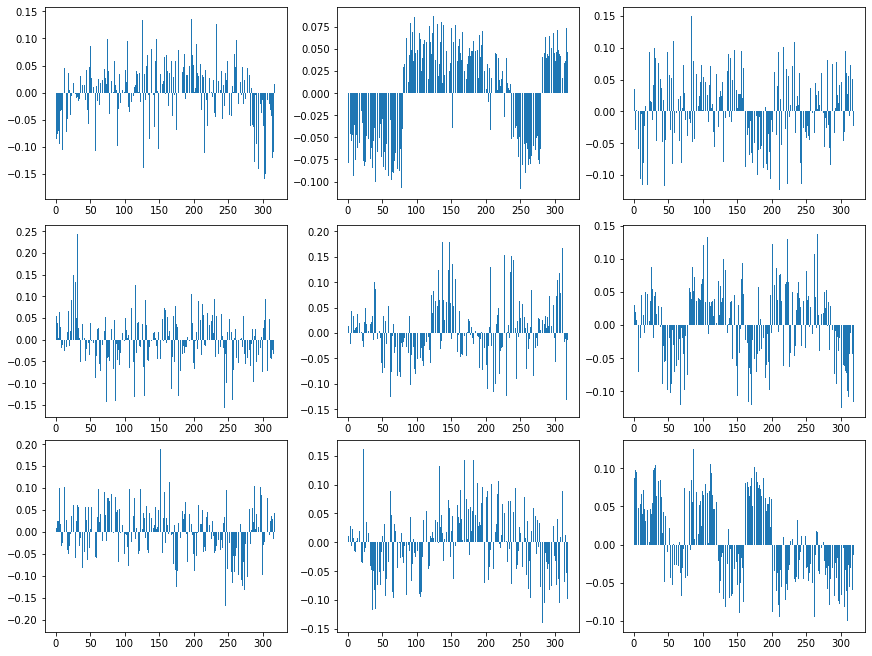

In [460]:
fig, axs = plt.subplots(3, 3, layout='constrained', figsize = (12,9))
names= list(range(1,320))
axs[0,0].bar(names, data_ica[:,0])
axs[0,1].bar(names, data_ica[:,1])
axs[0,2].bar(names, data_ica[:,2])
axs[1,0].bar(names, data_ica[:,3])
axs[1,1].bar(names, data_ica[:,4])
axs[1,2].bar(names, data_ica[:,5])
axs[2,0].bar(names, data_ica[:,6])
axs[2,1].bar(names, data_ica[:,7])
axs[2,2].bar(names, data_ica[:,8])
plt.show()

In [461]:
ica_sorted_dict_0, index_ica_sorted_0 = sort_values(data_ica[:,0])
ica_sorted_dict_1, index_ica_sorted_1 = sort_values(data_ica[:,1])
ica_sorted_dict_2, index_ica_sorted_2 = sort_values(data_ica[:,2])
ica_sorted_dict_3, index_ica_sorted_3 = sort_values(data_ica[:,3])
ica_sorted_dict_4, index_ica_sorted_4 = sort_values(data_ica[:,4])
ica_sorted_dict_5, index_ica_sorted_5 = sort_values(data_ica[:,5])
ica_sorted_dict_6, index_ica_sorted_6 = sort_values(data_ica[:,6])
ica_sorted_dict_7, index_ica_sorted_7 = sort_values(data_ica[:,7])
ica_sorted_dict_8, index_ica_sorted_8 = sort_values(data_ica[:,8])

In [462]:
names_ica_0, values_ica_0, bar_colors_ica_0 = compute_barplot_parameters_category(ica_sorted_dict_0,index_ica_sorted_0)
names_ica_1, values_ica_1, bar_colors_ica_1 = compute_barplot_parameters_category(ica_sorted_dict_1,index_ica_sorted_1)
names_ica_2, values_ica_2, bar_colors_ica_2 = compute_barplot_parameters_category(ica_sorted_dict_2,index_ica_sorted_2)
names_ica_3, values_ica_3, bar_colors_ica_3 = compute_barplot_parameters_category(ica_sorted_dict_3,index_ica_sorted_3)
names_ica_4, values_ica_4, bar_colors_ica_4 = compute_barplot_parameters_category(ica_sorted_dict_4,index_ica_sorted_4)
names_ica_5, values_ica_5, bar_colors_ica_5 = compute_barplot_parameters_category(ica_sorted_dict_5,index_ica_sorted_5)
names_ica_6, values_ica_6, bar_colors_ica_6 = compute_barplot_parameters_category(ica_sorted_dict_6,index_ica_sorted_6)
names_ica_7, values_ica_7, bar_colors_ica_7 = compute_barplot_parameters_category(ica_sorted_dict_7,index_ica_sorted_7)
names_ica_8, values_ica_8, bar_colors_ica_8 = compute_barplot_parameters_category(ica_sorted_dict_8,index_ica_sorted_8)

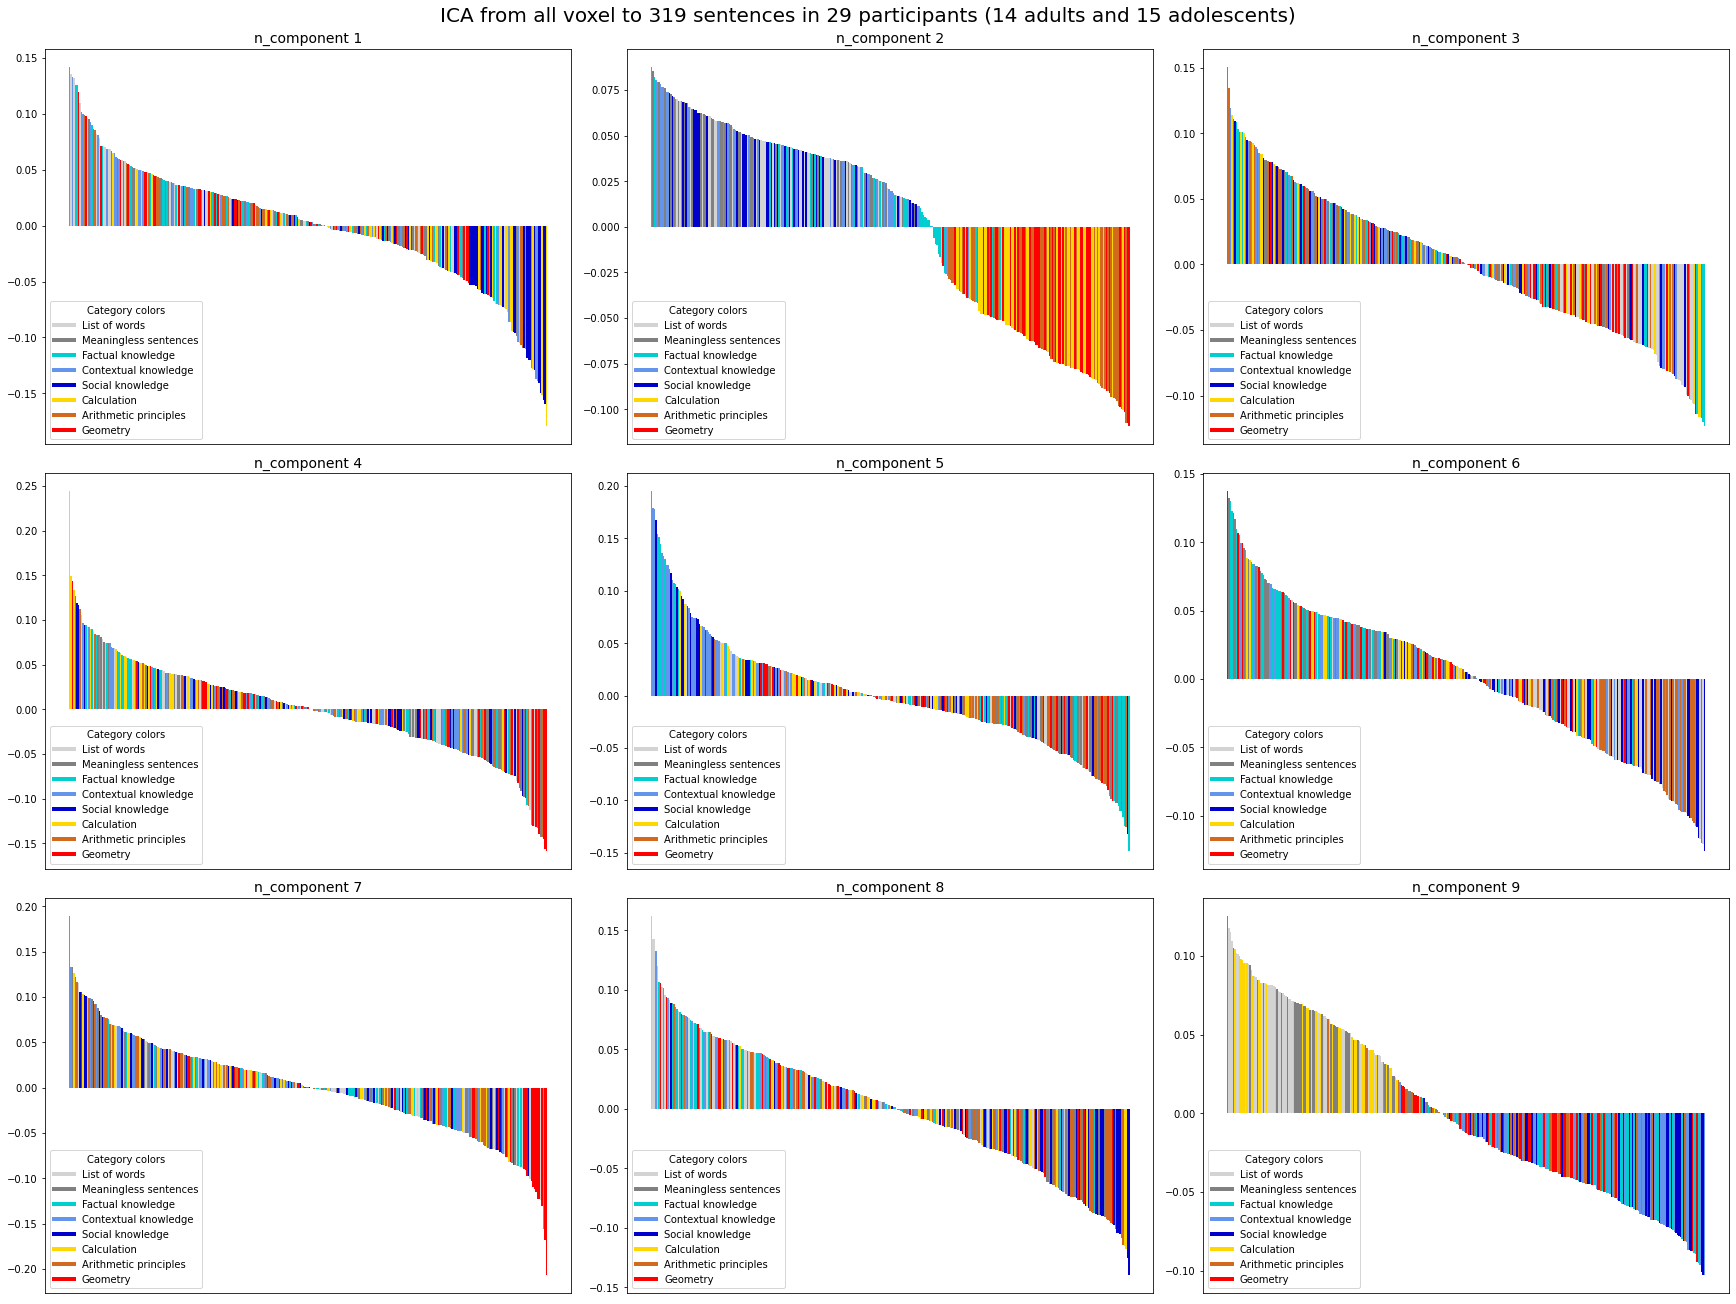

In [463]:
fig, axs = plt.subplots(3, 3, layout='constrained', figsize = (24,18))

axs[0,0].bar(names_ica_0, values_ica_0, color=bar_colors_ica_0, label=bar_labels, width=1)
axs[0,0].set_title('n_component 1', size = 14)
axs[0,0].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
axs[0,0].invert_xaxis()
axs[0,0].xaxis.set_visible(False)
axs[0,1].bar(names_ica_1, values_ica_1, color=bar_colors_ica_1, label=bar_labels, width=1)
axs[0,1].set_title('n_component 2', size = 14)
axs[0,1].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
axs[0,1].invert_xaxis()
axs[0,1].xaxis.set_visible(False)
axs[0,2].bar(names_ica_2, values_ica_2, color=bar_colors_ica_2, label=bar_labels, width=1)
axs[0,2].set_title('n_component 3', size = 14)
axs[0,2].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
axs[0,2].invert_xaxis()
axs[0,2].xaxis.set_visible(False)
axs[1,0].bar(names_ica_3, values_ica_3, color=bar_colors_ica_3, label=bar_labels, width=1)
axs[1,0].set_title('n_component 4', size = 14)
axs[1,0].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
axs[1,0].invert_xaxis()
axs[1,0].xaxis.set_visible(False)
axs[1,1].bar(names_ica_4, values_ica_4, color=bar_colors_ica_4, label=bar_labels, width=1)
axs[1,1].set_title('n_component 5', size = 14)
axs[1,1].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
axs[1,1].invert_xaxis()
axs[1,1].xaxis.set_visible(False)
axs[1,2].bar(names_ica_5, values_ica_5, color=bar_colors_ica_5, label=bar_labels, width=1)
axs[1,2].set_title('n_component 6', size = 14)
axs[1,2].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
axs[1,2].invert_xaxis()
axs[1,2].xaxis.set_visible(False)
axs[2,0].bar(names_ica_6, values_ica_6, color=bar_colors_ica_6, label=bar_labels, width=1)
axs[2,0].set_title('n_component 7', size = 14)
axs[2,0].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
axs[2,0].invert_xaxis()
axs[2,0].xaxis.set_visible(False)
axs[2,1].bar(names_ica_7, values_ica_7, color=bar_colors_ica_7, label=bar_labels, width=1)
axs[2,1].set_title('n_component 8', size = 14)
axs[2,1].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
axs[2,1].invert_xaxis()
axs[2,1].xaxis.set_visible(False)
axs[2,2].bar(names_ica_8, values_ica_8, color=bar_colors_ica_8, label=bar_labels, width=1)
axs[2,2].set_title('n_component 9', size = 14)
axs[2,2].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
axs[2,2].invert_xaxis()
axs[2,2].xaxis.set_visible(False)

fig.suptitle('ICA from all voxel to 319 sentences in 29 participants (14 adults and 15 adolescents)', size =20)
plt.show()

TEST NON-PARAMETRIC ICA NORMAN-HAIGNERE

In [9]:
data.shape
count=0

In [10]:
import numpy as np

# Create synthetic data
#M = data.shape[0] # number of features
#N = len(voxel) # number of measures
K = 6 # number of components
#R_true = np.random.rand(M,K)
#W_true = np.random.exponential(scale = 1, size=(K,N))
#X = R_true@W_true + .01*np.random.normal(M,N)
X=np.array(data.T)
print(X.shape, type(X))
from npica import ICA
N_RANDOM_INITS = 80000
RAND_SEED = 0
ica = ICA(K=K,N_RANDOM_INITS=N_RANDOM_INITS,RAND_SEED=RAND_SEED)
ica.fit(X)
print(ica.sources)


(373371, 319) <class 'numpy.ndarray'>
[[ 0.72825679  0.785259    0.68421164 ... -0.24594709 -0.4008674
  -0.77522074]
 [-0.0016185   0.26815187  0.30155976 ... -0.61157656  0.02855032
   0.41714701]
 [ 0.41695944  0.45943049  0.30551295 ...  0.79388075  1.02766209
   1.0216501 ]
 [ 0.68573713  0.28778421  0.18467672 ...  0.49753881  0.75791785
   0.68671671]
 [ 0.26578993  0.56544708  0.45767179 ...  0.60602992  0.36885181
   0.68216234]
 [ 0.73860804  0.51783187  0.46663316 ...  0.64835959  0.30969482
   0.57201756]]


In [13]:
count

2

In [12]:
npica = ica.sources.T
print(npica.shape)
count= count +1

(319, 6)


In [14]:
print(type(npica))
df_npica = pd.DataFrame(data = npica)
df_npica.to_csv(f'{subj}_matrix_sentencesXnpica_{K}-test-{count}-components_{N_RANDOM_INITS}-inits.csv', index = False)

<class 'numpy.ndarray'>


In [15]:
matrix_npica_componentsXvoxels = np.dot(npica.T,data)
print(matrix_npica_componentsXvoxels.shape)
print(type(matrix_npica_componentsXvoxels))
df = pd.DataFrame(data = matrix_npica_componentsXvoxels)
df.to_csv(f'{subj}matrix_npica_{K}-test-{count}_{N_RANDOM_INITS}-inits_componentsXvoxels.csv', index = False)

(6, 373371)
<class 'numpy.ndarray'>


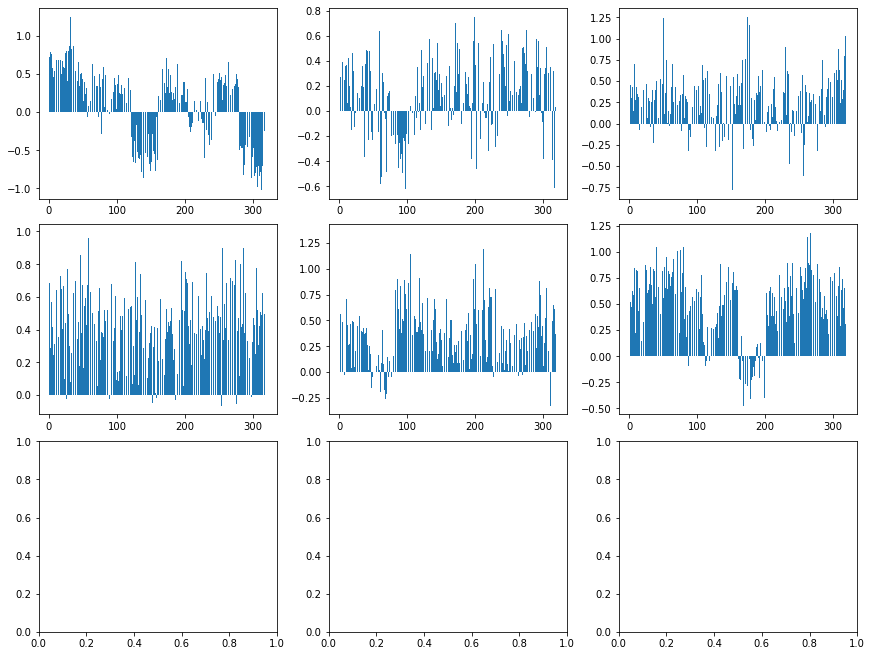

In [16]:
fig, axs = plt.subplots(3, 3, layout='constrained', figsize = (12,9))
names= list(range(1,320))
axs[0,0].bar(names, npica[:,0])
axs[0,1].bar(names, npica[:,1])
axs[0,2].bar(names, npica[:,2])
axs[1,0].bar(names, npica[:,3])
axs[1,1].bar(names, npica[:,4])
axs[1,2].bar(names, npica[:,5])
# axs[2,0].bar(names, npica[:,6])
# axs[2,1].bar(names, npica[:,7])
# axs[2,2].bar(names, npica[:,8])
plt.show()

In [17]:
npica_sorted_dict_0, index_npica_sorted_0 = sort_values(npica[:,0])
npica_sorted_dict_1, index_npica_sorted_1 = sort_values(npica[:,1])
npica_sorted_dict_2, index_npica_sorted_2 = sort_values(npica[:,2])
npica_sorted_dict_3, index_npica_sorted_3 = sort_values(npica[:,3])
npica_sorted_dict_4, index_npica_sorted_4 = sort_values(npica[:,4])
npica_sorted_dict_5, index_npica_sorted_5 = sort_values(npica[:,5])
# npica_sorted_dict_6, index_npica_sorted_6 = sort_values(npica[:,6])
# npica_sorted_dict_7, index_npica_sorted_7 = sort_values(npica[:,7])
# npica_sorted_dict_8, index_npica_sorted_8 = sort_values(npica[:,8])

In [18]:
names_npica_0, values_npica_0, bar_colors_npica_0 = compute_barplot_parameters_category(npica_sorted_dict_0,index_npica_sorted_0)
names_npica_1, values_npica_1, bar_colors_npica_1 = compute_barplot_parameters_category(npica_sorted_dict_1,index_npica_sorted_1)
names_npica_2, values_npica_2, bar_colors_npica_2 = compute_barplot_parameters_category(npica_sorted_dict_2,index_npica_sorted_2)
names_npica_3, values_npica_3, bar_colors_npica_3 = compute_barplot_parameters_category(npica_sorted_dict_3,index_npica_sorted_3)
names_npica_4, values_npica_4, bar_colors_npica_4 = compute_barplot_parameters_category(npica_sorted_dict_4,index_npica_sorted_4)
names_npica_5, values_npica_5, bar_colors_npica_5 = compute_barplot_parameters_category(npica_sorted_dict_5,index_npica_sorted_5)
# names_npica_6, values_npica_6, bar_colors_npica_6 = compute_barplot_parameters_category(npica_sorted_dict_6,index_npica_sorted_6)
# names_npica_7, values_npica_7, bar_colors_npica_7 = compute_barplot_parameters_category(npica_sorted_dict_7,index_npica_sorted_7)
# names_npica_8, values_npica_8, bar_colors_npica_8 = compute_barplot_parameters_category(npica_sorted_dict_8,index_npica_sorted_8)

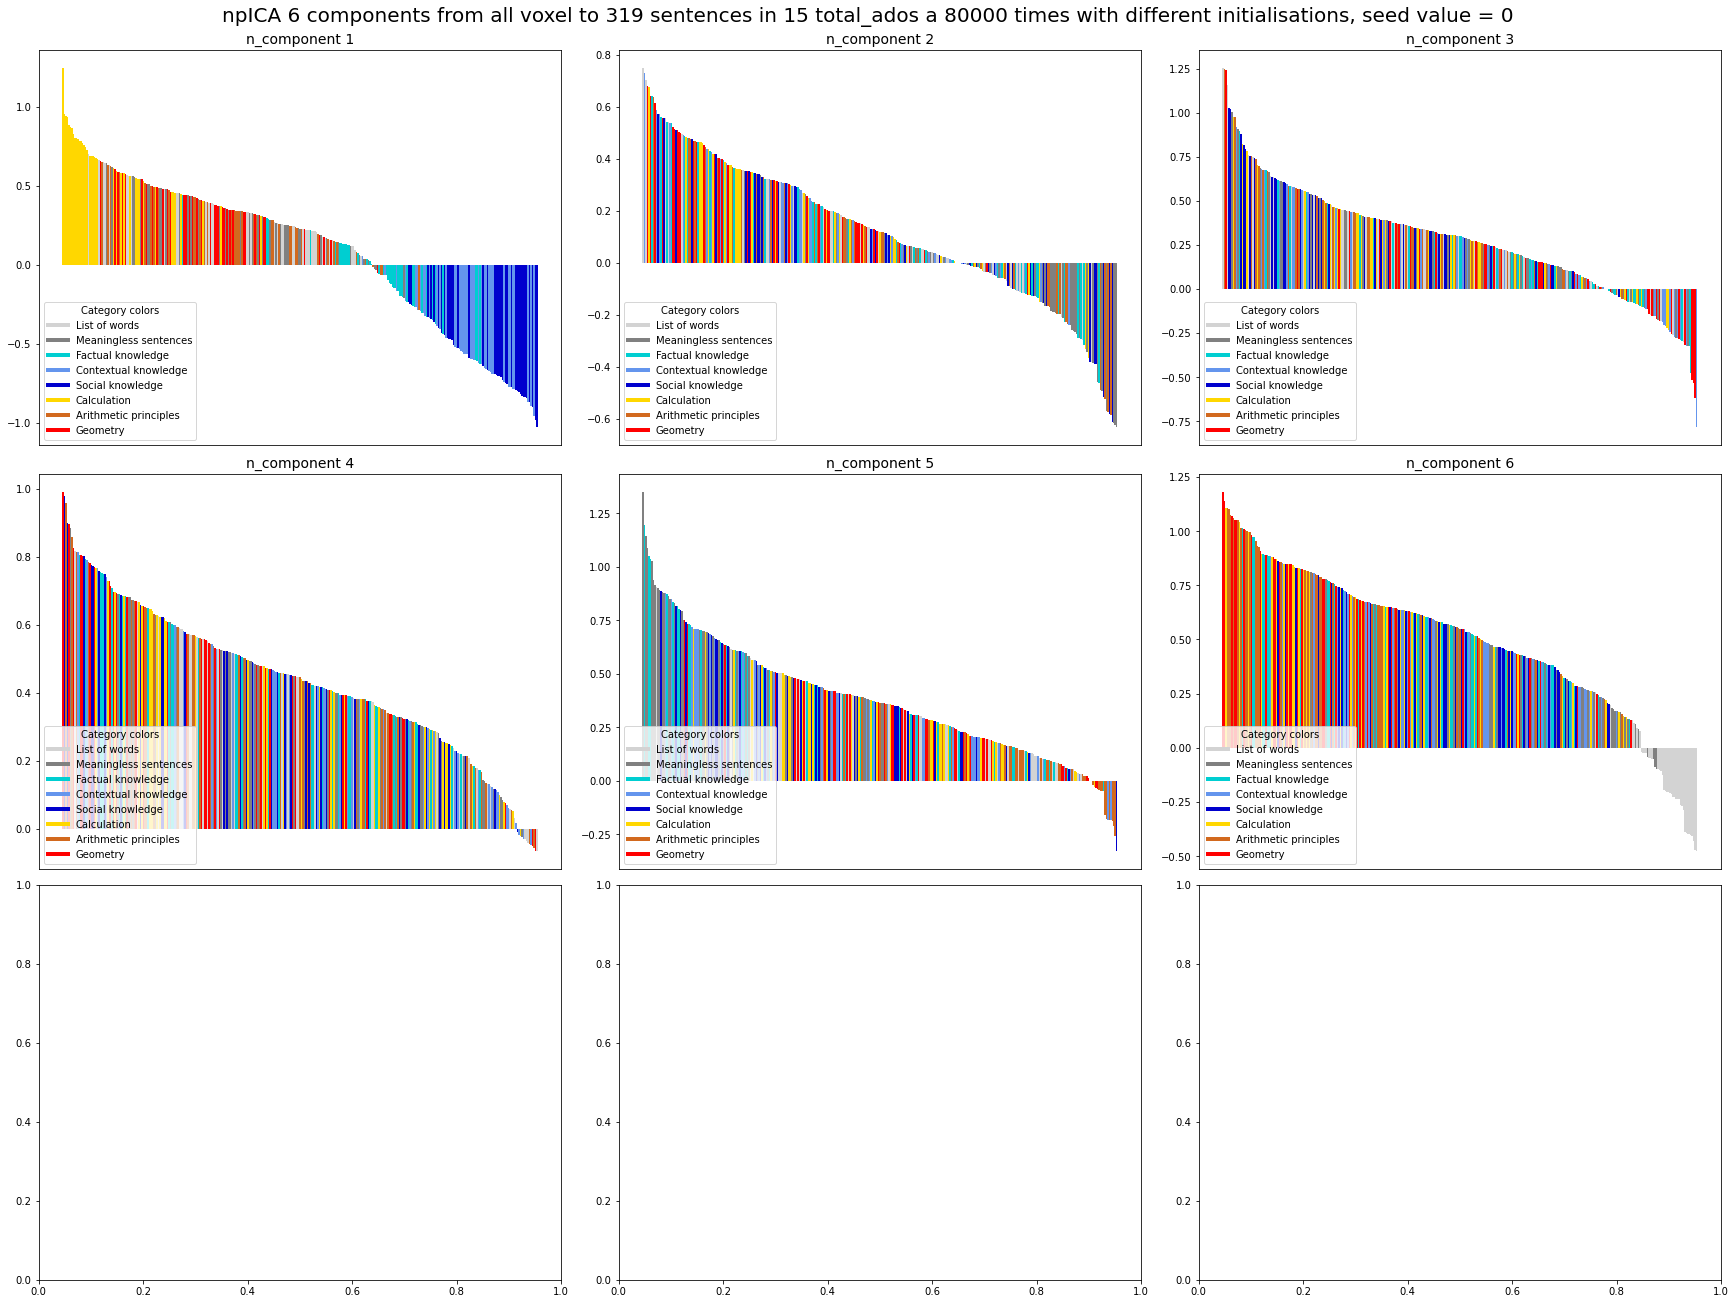

In [19]:
fig, axs = plt.subplots(3, 3, layout='constrained', figsize = (24,18))

axs[0,0].bar(names_npica_0, values_npica_0, color=bar_colors_npica_0, label=bar_labels, width=1)
axs[0,0].set_title('n_component 1', size = 14)
axs[0,0].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
axs[0,0].invert_xaxis()
axs[0,0].xaxis.set_visible(False)
axs[0,1].bar(names_npica_1, values_npica_1, color=bar_colors_npica_1, label=bar_labels, width=1)
axs[0,1].set_title('n_component 2', size = 14)
axs[0,1].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
axs[0,1].invert_xaxis()
axs[0,1].xaxis.set_visible(False)
axs[0,2].bar(names_npica_2, values_npica_2, color=bar_colors_npica_2, label=bar_labels, width=1)
axs[0,2].set_title('n_component 3', size = 14)
axs[0,2].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
axs[0,2].invert_xaxis()
axs[0,2].xaxis.set_visible(False)
axs[1,0].bar(names_npica_3, values_npica_3, color=bar_colors_npica_3, label=bar_labels, width=1)
axs[1,0].set_title('n_component 4', size = 14)
axs[1,0].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
axs[1,0].invert_xaxis()
axs[1,0].xaxis.set_visible(False)
axs[1,1].bar(names_npica_4, values_npica_4, color=bar_colors_npica_4, label=bar_labels, width=1)
axs[1,1].set_title('n_component 5', size = 14)
axs[1,1].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
axs[1,1].invert_xaxis()
axs[1,1].xaxis.set_visible(False)
axs[1,2].bar(names_npica_5, values_npica_5, color=bar_colors_npica_5, label=bar_labels, width=1)
axs[1,2].set_title('n_component 6', size = 14)
axs[1,2].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
axs[1,2].invert_xaxis()
axs[1,2].xaxis.set_visible(False)
# axs[2,0].bar(names_npica_6, values_npica_6, color=bar_colors_npica_6, label=bar_labels, width=1)
# axs[2,0].set_title('n_component 7', size = 14)
# axs[2,0].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
# axs[2,0].invert_xaxis()
# axs[2,0].xaxis.set_visible(False)
# axs[2,1].bar(names_npica_7, values_npica_7, color=bar_colors_npica_7, label=bar_labels, width=1)
# axs[2,1].set_title('n_component 8', size = 14)
# axs[2,1].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
# axs[2,1].invert_xaxis()
# axs[2,1].xaxis.set_visible(False)
# axs[2,2].bar(names_npica_8, values_npica_8, color=bar_colors_npica_8, label=bar_labels, width=1)
# axs[2,2].set_title('n_component 9', size = 14)
# axs[2,2].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
# axs[2,2].invert_xaxis()
# axs[2,2].xaxis.set_visible(False)

fig.suptitle(f'npICA {K} components from all voxel to 319 sentences in 15 {subj} a {N_RANDOM_INITS} times with different initialisations, seed value = {RAND_SEED}', size =20)
plt.show()

### Correlation between adults and adolescents

In [158]:
ados_matrix = pd.read_csv('ados_matrix_sentencesXpca_components.csv')
adults_matrix = pd.read_csv('adults_matrix_sentencesXpca_components.csv')

In [162]:
matrix_data = pd.concat([ados_matrix, adults_matrix], axis = 1)
matrix_data.head()

,0,1,2,3,4,5,6,7,8,0,1,2,3,4,5,6,7,8
0,-384.113196,-138.384428,-74.100662,-1.294784,-159.918146,-51.430438,70.643875,145.248376,30.339611,-596.715003,78.904740,139.331230,32.519981,17.892111,-36.850636,39.045625,197.526358,41.623518
1,-412.203676,222.847348,10.445245,128.693637,-4.005402,51.088768,-11.654509,100.850286,-62.099829,-388.671859,-174.417737,-11.525557,-100.278376,-55.609440,4.189498,183.743601,52.087794,-8.604315
2,-392.666131,183.675331,23.304225,71.149344,74.498802,78.759107,-76.535729,177.346236,-130.547953,-440.100501,-77.636377,122.862750,-90.115455,-58.020677,71.832704,-81.212938,6.690703,53.008617
3,-306.955768,-248.571376,74.809693,-16.881182,-184.324970,67.835540,-46.005659,134.247113,-26.903772,-406.253856,-50.586100,266.728007,-62.872773,35.396509,38.310471,-20.749896,3.336256,53.020350
4,-347.999775,183.983377,-82.261380,91.849457,5.232703,-33.955663,-86.764638,84.449947,4.004373,-519.812060,84.390977,137.471113,-16.562997,91.716674,-19.013619,87.001849,105.329645,135.139105


In [165]:
ados_matrix.corrwith(adults_matrix, axis =0)

0    0.858659
1    0.076872
2    0.773545
3    0.392360
4    0.429298
5   -0.189484
6    0.247801
7    0.084531
8   -0.197286
dtype: float64

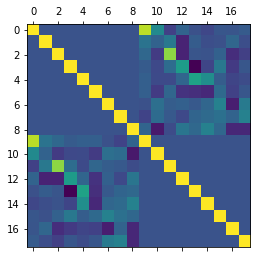

In [169]:
corr = matrix_data.corr()
plt.matshow(matrix_data.corr())
plt.show()

In [171]:
print(corr.shape)

(18, 18)


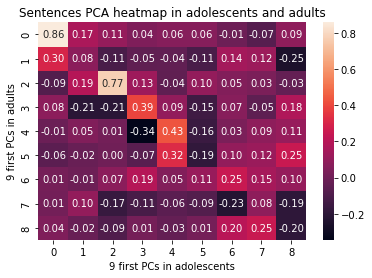

In [177]:
corr_matrix_sub=corr.values
df_matrix=pd.DataFrame(corr_matrix_sub[9:,:9])
ax = plt.axes()
ax.invert_yaxis()
sns.heatmap(df_matrix, annot=True, ax=ax, fmt=".2f")
ax.set_title(f'Sentences PCA heatmap in adolescents and adults')
plt.xlabel('9 first PCs in adolescents')
plt.ylabel('9 first PCs in adults')
plt.show()

In [178]:
ados_matrix_npica = pd.read_csv('ados_matrix_sentencesXnpica_components.csv')
adults_matrix_npica = pd.read_csv('adults_matrix_sentencesXnpica_components.csv')

In [179]:
matrix_data_npica = pd.concat([ados_matrix_npica, adults_matrix_npica], axis = 1)
matrix_data_npica.head()

,0,1,2,3,4,5,6,7,8,0,1,2,3,4,5,6,7,8
0,0.617355,0.600188,0.530501,0.138790,0.592694,0.395149,0.527106,0.681708,-0.031468,0.527438,0.380472,0.468220,-0.203410,0.134018,0.691564,0.494814,0.739055,0.558917
1,0.404455,-0.150735,0.415037,0.244138,0.387321,0.532169,0.597200,0.476226,0.046021,0.343926,0.563159,0.418468,0.153334,0.256953,0.265296,0.146517,0.800761,0.415019
2,0.320524,-0.262685,0.310243,0.098348,0.247656,0.593603,0.775984,0.581732,-0.081153,0.725530,0.150566,0.332209,0.080929,0.130645,0.508275,-0.029037,0.429072,0.386406
3,0.396822,0.569368,0.423550,-0.030943,0.336745,0.340330,0.696616,0.533888,0.143188,0.582267,0.106896,0.404667,-0.054229,0.233997,0.499013,-0.042676,0.530816,0.183168
4,0.624774,-0.101527,0.201794,0.213574,0.511633,0.407257,0.558058,0.569164,0.043971,0.579971,0.361356,0.410557,-0.303348,0.281582,0.389721,0.190089,0.864431,0.425301


In [180]:
ados_matrix_npica.corrwith(adults_matrix_npica, axis =0)

0    0.316221
1   -0.033584
2    0.133109
3    0.137854
4   -0.048751
5    0.067370
6    0.052754
7   -0.035933
8    0.013787
dtype: float64

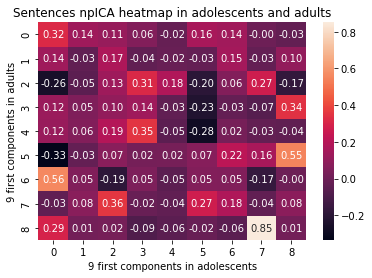

In [181]:
corr_npica = matrix_data_npica.corr()
corr_matrix_sub_npica=corr_npica.values
df_matrix_npica=pd.DataFrame(corr_matrix_sub_npica[9:,:9])
ax = plt.axes()
sns.heatmap(df_matrix_npica, annot=True, ax=ax, fmt=".2f")
ax.set_title(f'Sentences npICA heatmap in adolescents and adults')
plt.xlabel('9 first components in adolescents')
plt.ylabel('9 first components in adults')
plt.show()